In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
from google.colab import files
uploaded = files.upload() # upload CSVs from local to google colab

Saving CostSKUCouches.csv to CostSKUCouches (1).csv
Saving CouchCode.ipynb to CouchCode (1).ipynb
Saving Festivals - Pricing.csv to Festivals - Pricing (1).csv
Saving Festivals - Pricing.xlsx to Festivals - Pricing (1).xlsx
Saving NationalGlobalSalesWeightedBasePriceSkuStoreMattressesMatrix.csv to NationalGlobalSalesWeightedBasePriceSkuStoreMattressesMatrix (1).csv
Saving NationalGlobalSalesWeightedDiscountedPriceSkuStoreMattressesMatrix.csv to NationalGlobalSalesWeightedDiscountedPriceSkuStoreMattressesMatrix (1).csv
Saving NationalUnitSalesSkuStoreMattressesMatrix.csv to NationalUnitSalesSkuStoreMattressesMatrix (1).csv
Saving NationTotalUnitsSoldCouches.csv to NationTotalUnitsSoldCouches (1).csv
Saving SKUInformation_Couches.csv to SKUInformation_Couches (1).csv


## 1.Load data from CSV to dataframe

In [5]:
df_cost = pd.DataFrame(pd.read_csv('CostSKUCouches.csv'))
df_festival = pd.DataFrame(pd.read_excel('Festivals - Pricing.xlsx'))
df_base_price = pd.DataFrame(pd.read_csv('NationalGlobalSalesWeightedBasePriceSkuStoreMattressesMatrix.csv'))
df_discounted_price = pd.DataFrame(pd.read_csv('NationalGlobalSalesWeightedDiscountedPriceSkuStoreMattressesMatrix.csv'))
df_units = pd.DataFrame(pd.read_csv('NationalUnitSalesSkuStoreMattressesMatrix.csv'))
df_total_units = pd.DataFrame(pd.read_csv('NationTotalUnitsSoldCouches.csv'))
df_infor = pd.DataFrame(pd.read_csv('SKUInformation_Couches.csv'))

In [6]:
df_cost.shape, df_festival.shape, df_base_price.shape, df_discounted_price.shape, df_units.shape,df_total_units.shape, df_infor.shape


((81, 3), (21, 417), (81, 372), (81, 372), (81, 372), (1, 372), (81, 5))

## 2. Ordered  SKU and weeks DataFrame with the rest of features

In [7]:
# Transposed dataFrame to handle the weeks in each row
df_festival_T = df_festival.set_index('Weeks').T
#df_festival_T

In [8]:
# Base Price

base_price_df = pd.DataFrame()
for row in df_base_price.SKU:
  a =df_base_price.loc[df_base_price['SKU']==row]
  b = a.set_index('SKU').T
  b['Weeks'] = b.index
  b['SKU']=row
 
  b.columns = [ 'base_price','Week', 'SKU']
  b.reset_index(drop=True, inplace=True)
  base_price_df = base_price_df.append(b)


In [9]:
# Discounted Price

discounted_price_df = pd.DataFrame()
for row in df_discounted_price.SKU:
  a =df_discounted_price.loc[df_discounted_price['SKU']==row]
  b = a.set_index('SKU').T
  b['Weeks'] = b.index
  b['SKU']=row
 
  b.columns = [ 'discounted_price','Week', 'SKU']
  b.reset_index(drop=True, inplace=True)
  discounted_price_df = discounted_price_df.append(b)

In [10]:
# units

units_df = pd.DataFrame()
for row in df_units.SKU:
  a =df_units.loc[df_units['SKU']==row]
  b = a.set_index('SKU').T
  b['Weeks'] = b.index
  b['SKU']=row
 
  b.columns = [ 'units','Week', 'SKU']
  b.reset_index(drop=True, inplace=True)
  units_df = units_df.append(b)

In [11]:
# total units

a = df_total_units.T
a['Week'] = a.index
a.columns =[ 'total_units', 'Week']
a.reset_index(drop=True, inplace=True)
total_units_df = a


In [12]:
# Festival dates
a = df_festival.T
a['Week'] = a.index
a.columns =['New Year',	'Wise men',	'Constitution',	'Valentines Day',	'Birth of Benito Juarez',
'Good Friday',	'Childrens Day',	'Mothers Day',	'Fathers Day',	'Independence Day',	'Day of the dead'	,'Revolution Day',	'Christmas',	'World Cup',	'Play off Mexican Soccer League',	'Caribbean Series',
'LMP (Baseball)',	'LMV (Baseball)',	'Superbowl'	,'World Series',	'December ', 'Week']
a.reset_index(drop=True, inplace=True)
festival_df = a.iloc[1:,:]


In [13]:
df_1 = pd.concat([base_price_df,discounted_price_df, units_df], axis=1)
df_1.head()

base_price     Week     SKU  ...  units     Week     SKU
0         NaN  2014.01  401343  ...      0  2014.01  401343
1         NaN  2014.02  401343  ...      0  2014.02  401343
2         NaN  2014.03  401343  ...      0  2014.03  401343
3         NaN  2014.04  401343  ...      0  2014.04  401343
4         NaN  2014.05  401343  ...      0  2014.05  401343

[5 rows x 9 columns]

In [14]:
df_1 = df_1.loc[:,~df_1.columns.duplicated()]
df_1.head()

base_price     Week     SKU  discounted_price  units
0         NaN  2014.01  401343               NaN      0
1         NaN  2014.02  401343               NaN      0
2         NaN  2014.03  401343               NaN      0
3         NaN  2014.04  401343               NaN      0
4         NaN  2014.05  401343               NaN      0

In [15]:
df_2 = pd.merge(df_1, total_units_df, on='Week', how='left')

In [16]:
df_2.head()

base_price     Week     SKU  discounted_price  units  total_units
0         NaN  2014.01  401343               NaN      0         3693
1         NaN  2014.02  401343               NaN      0         3125
2         NaN  2014.03  401343               NaN      0         3167
3         NaN  2014.04  401343               NaN      0         2607
4         NaN  2014.05  401343               NaN      0         3016

In [17]:
df_3 = pd.merge(df_2, df_cost, on='SKU', how='left')
df_3.head()

base_price     Week     SKU  ...  total_units   DC    COST
0         NaN  2014.01  401343  ...         3693  401  1808.0
1         NaN  2014.02  401343  ...         3125  401  1808.0
2         NaN  2014.03  401343  ...         3167  401  1808.0
3         NaN  2014.04  401343  ...         2607  401  1808.0
4         NaN  2014.05  401343  ...         3016  401  1808.0

[5 rows x 8 columns]

In [18]:
df_4 = pd.merge(df_3, df_infor, on='SKU', how='left')

In [19]:
df_4.Week = df_4.Week.astype(float)

In [20]:
# After making the corresponding unions, merging and joining, we have the following final dataframe df in the required format

df = pd.merge(df_4,festival_df, on='Week', how='left')
df.head(10)

base_price     Week     SKU  ...  Superbowl  World Series  December 
0         NaN  2014.01  401343  ...          0             0          0
1         NaN  2014.02  401343  ...          0             0          0
2         NaN  2014.03  401343  ...          0             0          0
3         NaN  2014.04  401343  ...          0             0          0
4         NaN  2014.05  401343  ...          1             0          0
5         NaN  2014.06  401343  ...          0             0          0
6         NaN  2014.07  401343  ...          0             0          0
7         NaN  2014.08  401343  ...          0             0          0
8         NaN  2014.09  401343  ...          0             0          0
9         NaN   2014.1  401343  ...          0             0          0

[10 rows x 33 columns]

In [21]:
# Sorting out the columns

df=df[['Week', 'SKU', 'COST','base_price','discounted_price', 'units', 'total_units', 'BRAND', 'MODEL', 'SIZE', 'DC','STYLE','New Year',	'Wise men',	'Constitution',	'Valentines Day',	'Birth of Benito Juarez',
'Good Friday',	'Childrens Day',	'Mothers Day',	'Fathers Day',	'Independence Day',	'Day of the dead'	,'Revolution Day',	'Christmas',	'World Cup',	'Play off Mexican Soccer League',	'Caribbean Series',
'LMP (Baseball)',	'LMV (Baseball)',	'Superbowl'	,'World Series',	'December ']]

In [22]:
df

Week     SKU    COST  ...  Superbowl  World Series  December 
0      2014.01  401343  1808.0  ...          0             0          0
1      2014.02  401343  1808.0  ...          0             0          0
2      2014.03  401343  1808.0  ...          0             0          0
3      2014.04  401343  1808.0  ...          0             0          0
4      2014.05  401343  1808.0  ...          1             0          0
...        ...     ...     ...  ...        ...           ...        ...
30046  2021.03  491811  3413.0  ...          0             0          0
30047  2021.04  491811  3413.0  ...          0             0          0
30048  2021.05  491811  3413.0  ...          0             0          0
30049  2021.06  491811  3413.0  ...          1             0          0
30050  2021.07  491811  3413.0  ...          0             0          0

[30051 rows x 33 columns]

## 3. Best Seller SKU

In [23]:
# A new dataframe is created for the last year sales

df_2020 = df.loc[df.Week.between(2020.01, 2020.52)]


In [24]:
# SKU's ordered from highest sale to lowest
df_2020_best_seller = df_2020.groupby(['SKU']).sum().sort_values(by='units', ascending=False).reset_index().drop(['COST','base_price', 'discounted_price','total_units','DC'], axis=1)
df_2020_best_seller

SKU  units
0   427979  14553
1   427987  14437
2   427962  11444
3   406015  10398
4   423019  10114
..     ...    ...
76  454364     18
77  454275     11
78  454293      9
79  454259      8
80  465579      0

[81 rows x 2 columns]

In [25]:
# Considering that 100% of SKU is 80, then 90% is 72. Following this logic, 90% of SKU's (72) with the most sales are given by the following list:
list_90_percent_best_seller = list(df_2020_best_seller.SKU[0:72])
list_90_percent_best_seller

[427979,
 427987,
 427962,
 406015,
 423019,
 401432,
 422993,
 401449,
 427594,
 428525,
 428533,
 423061,
 446726,
 416251,
 423434,
 416233,
 423452,
 401343,
 428517,
 401423,
 402382,
 402399,
 491802,
 428045,
 416276,
 491811,
 428037,
 401368,
 416284,
 416243,
 402403,
 423443,
 428029,
 428593,
 428606,
 401351,
 416268,
 428584,
 429319,
 428003,
 428012,
 427995,
 420729,
 420737,
 470767,
 420745,
 409296,
 429327,
 423795,
 423809,
 409271,
 430813,
 409245,
 430823,
 423787,
 409253,
 451969,
 430805,
 454054,
 424083,
 451713,
 451731,
 453971,
 451748,
 424074,
 424041,
 454437,
 451723,
 453602,
 454348,
 454429,
 454283]

In [26]:
# Now filtering the dataframe df_2020 according to the 90 % best seller list
df_2020.loc[df_2020.SKU.isin(list_90_percent_best_seller)].head()

Week     SKU    COST  ...  Superbowl  World Series  December 
312  2020.01  401343  1808.0  ...          0             0          0
313  2020.02  401343  1808.0  ...          0             0          0
314  2020.03  401343  1808.0  ...          0             0          0
315  2020.04  401343  1808.0  ...          0             0          0
316  2020.05  401343  1808.0  ...          1             0          0

[5 rows x 33 columns]

## 4. Plots for every SKU

In [27]:
# A dataframe for last two years is created. Date column and ISO(ISO-8601) column are added from Week column to handle the time data in best way.

start_date = 2019.01
end_date = 2021.07

df_2 = df.loc[df.Week.between(start_date, end_date)]
df_2.Week = df_2.Week.astype(str)
df_2.Week
df_2[['Year','Week_number']]=df_2.Week.str.split('.',expand=True)
df_2['Date'] = pd.to_datetime(df_2.Week_number.astype(str)+
                           df_2.Year.astype(str).add('-1') ,format='%V%G-%u')
df_2['ISO'] = df_2.Year.astype(str) + '-W' + df_2.Week_number.astype(str) + '-1'
df_2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Week     SKU    COST  ...  Week_number       Date         ISO
260  2019.01  401343  1808.0  ...           01 2018-12-31  2019-W01-1
261  2019.02  401343  1808.0  ...           02 2019-01-07  2019-W02-1
262  2019.03  401343  1808.0  ...           03 2019-01-14  2019-W03-1
263  2019.04  401343  1808.0  ...           04 2019-01-21  2019-W04-1
264  2019.05  401343  1808.0  ...           05 2019-01-28  2019-W05-1

[5 rows x 37 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

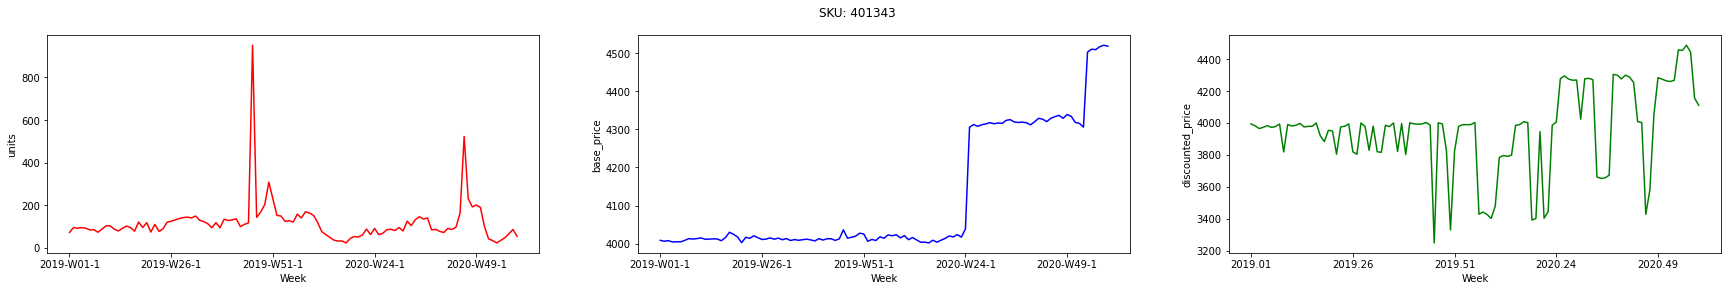

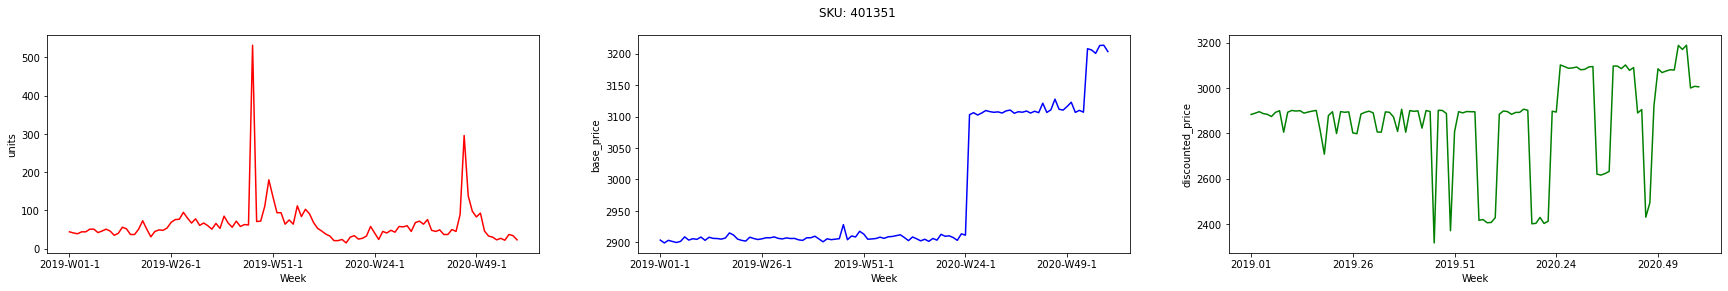

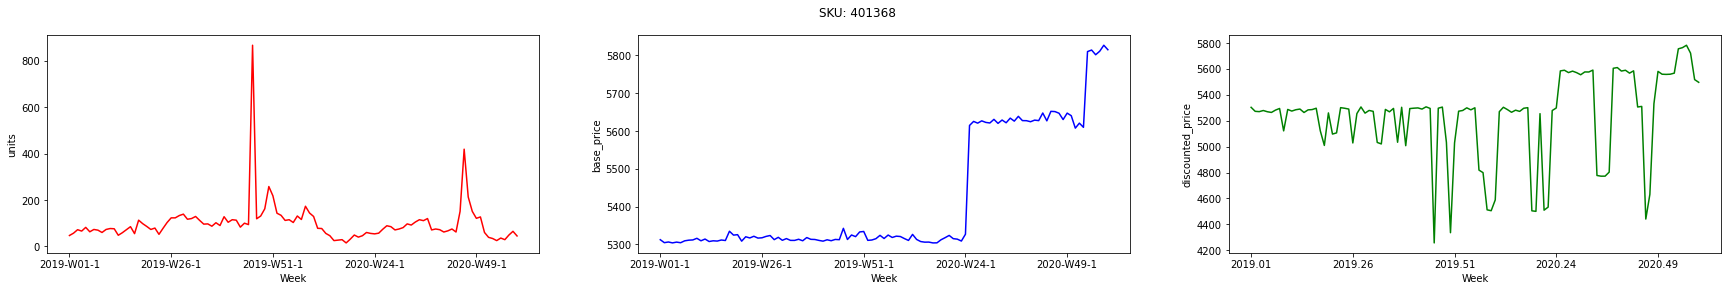

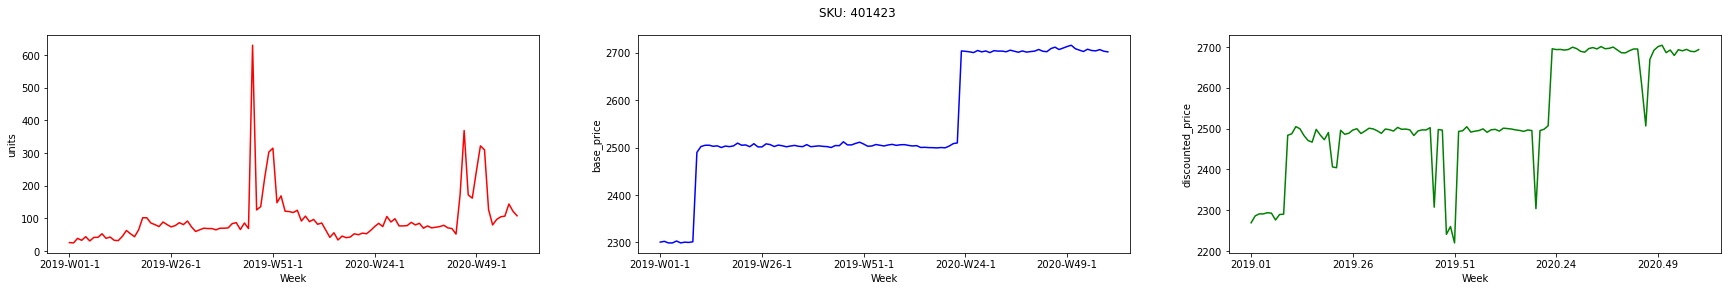

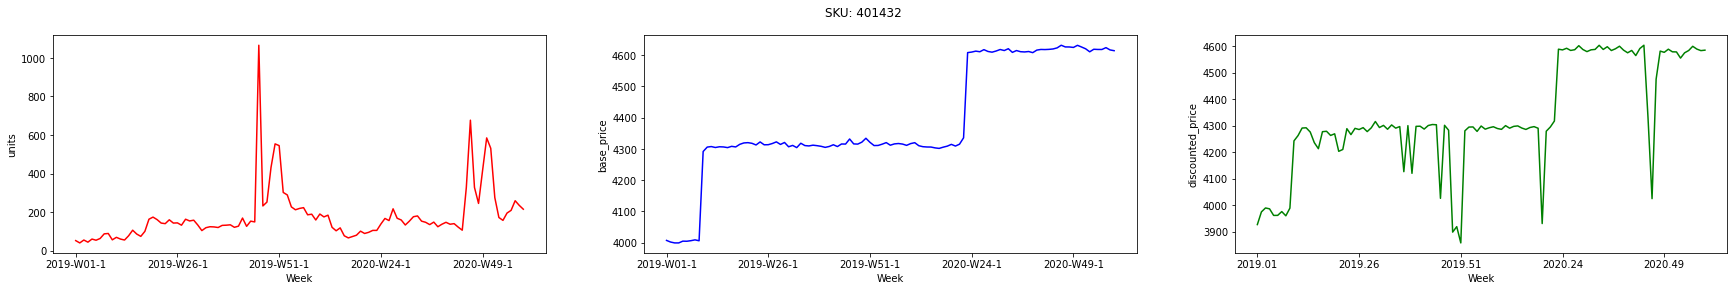

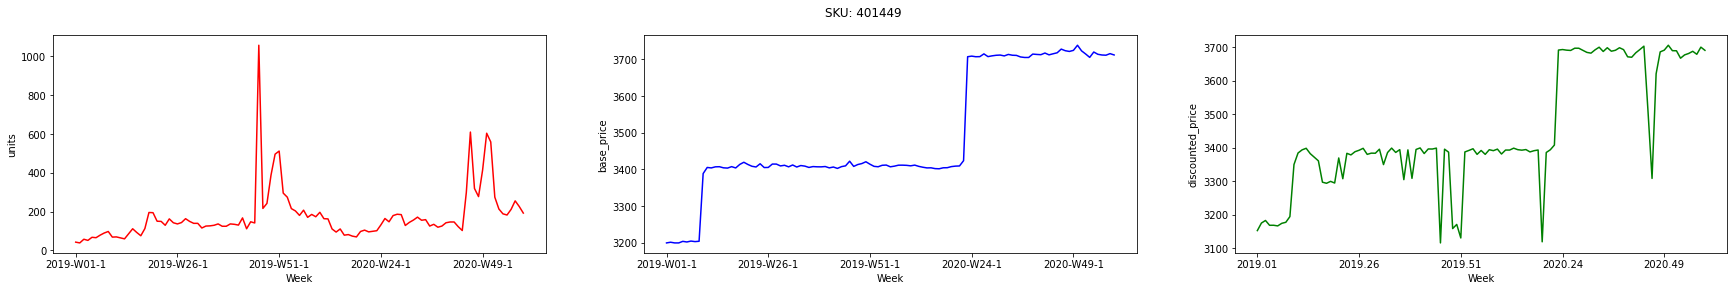

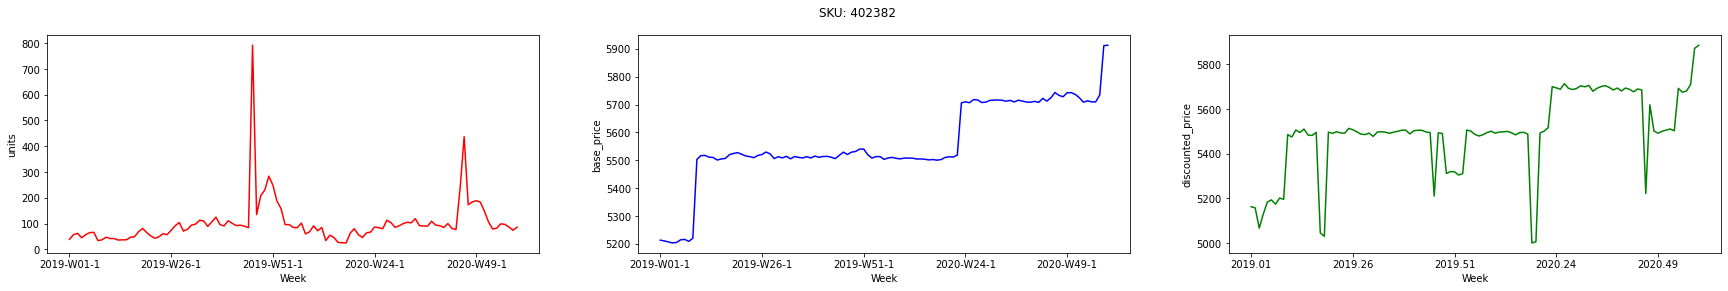

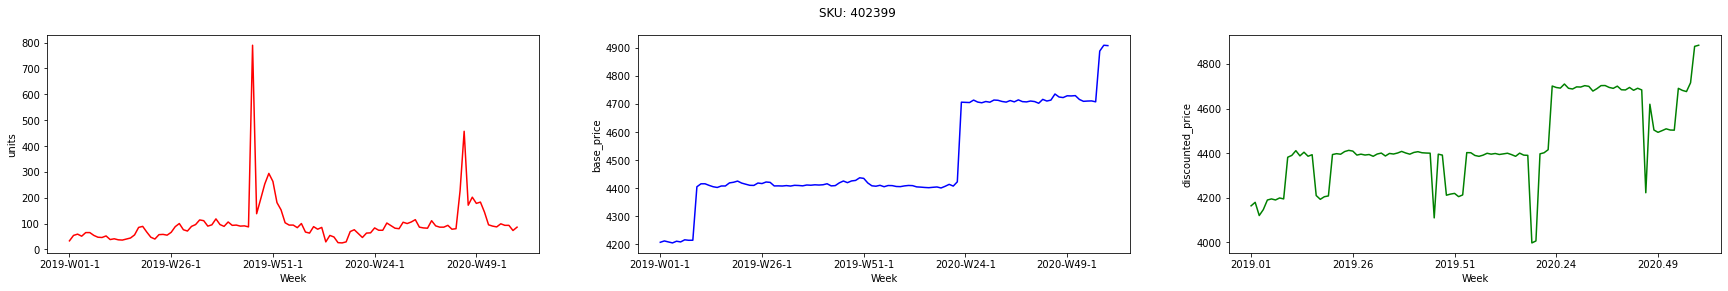

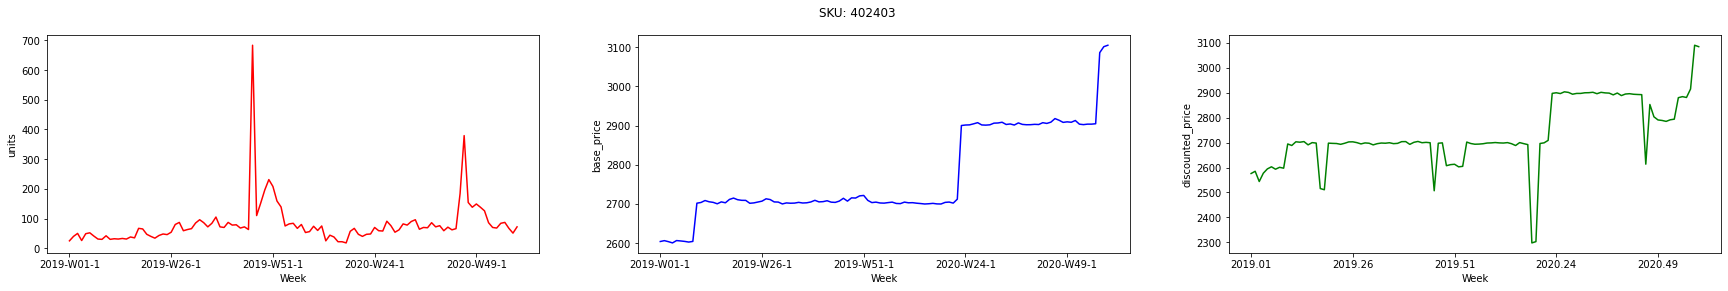

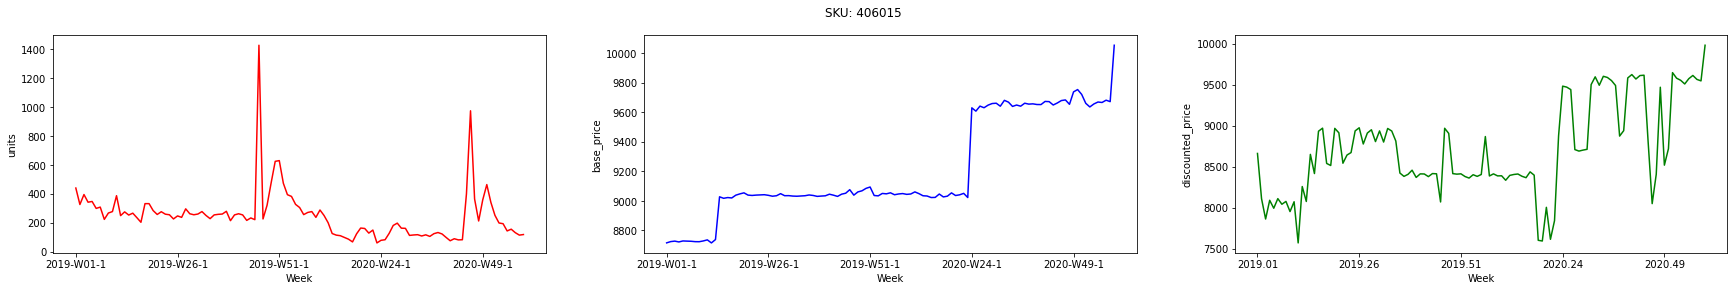

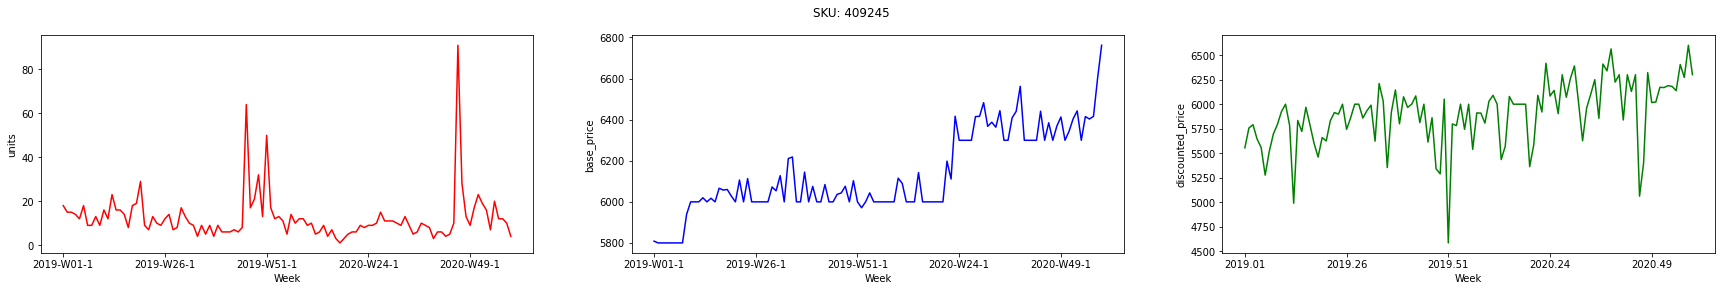

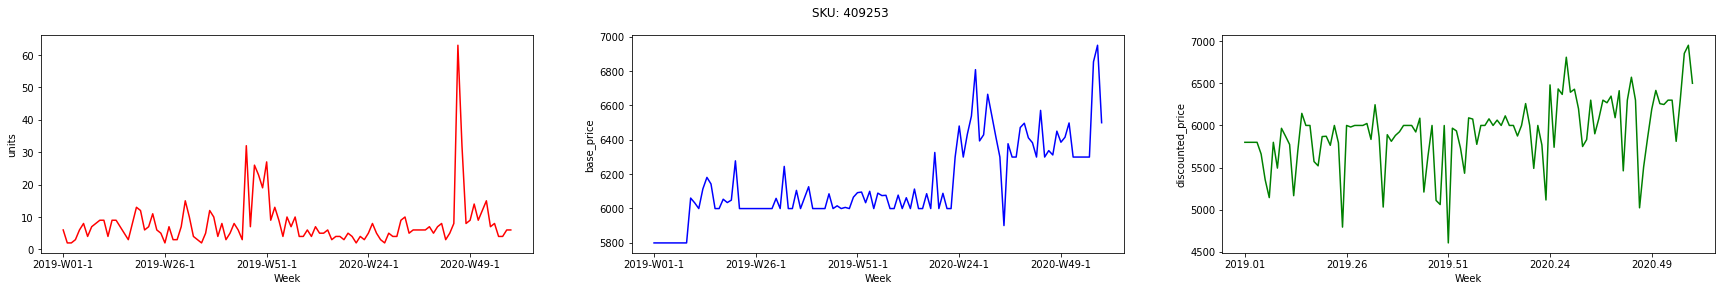

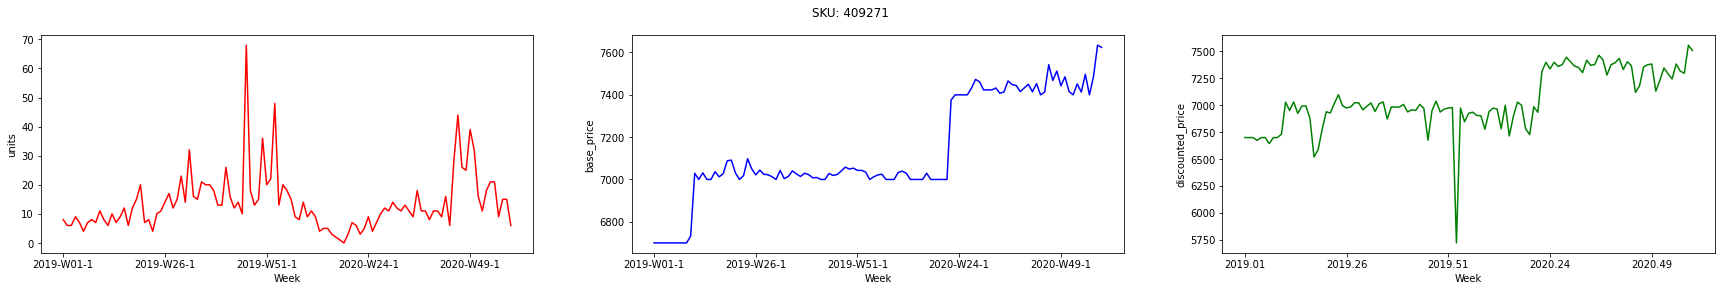

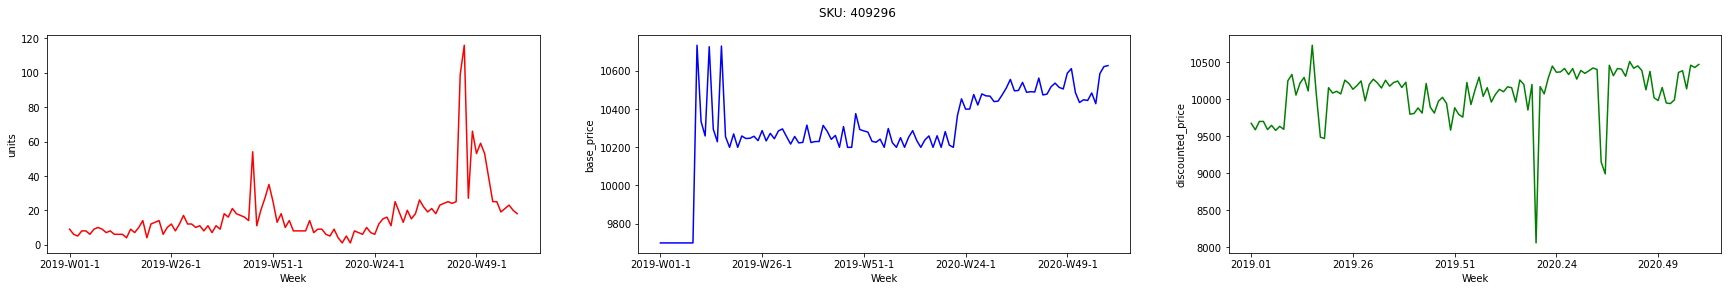

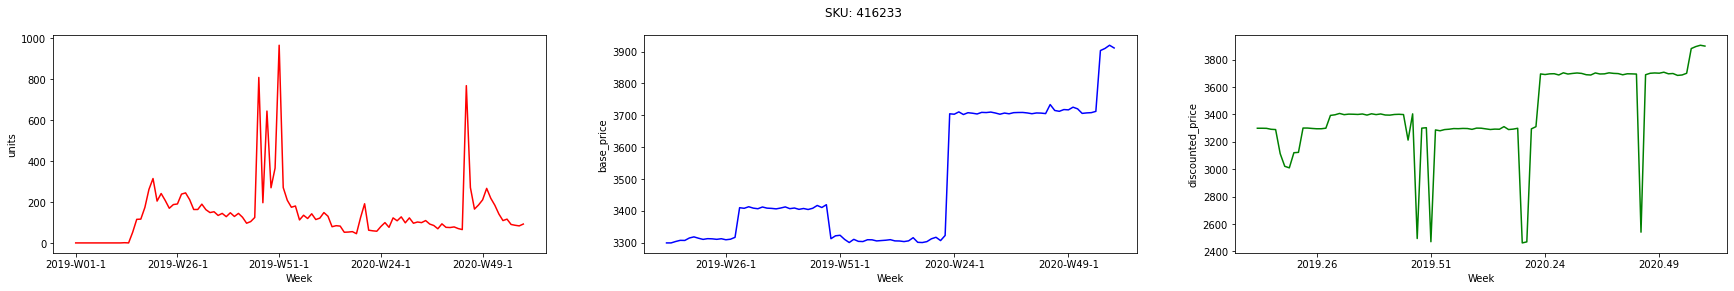

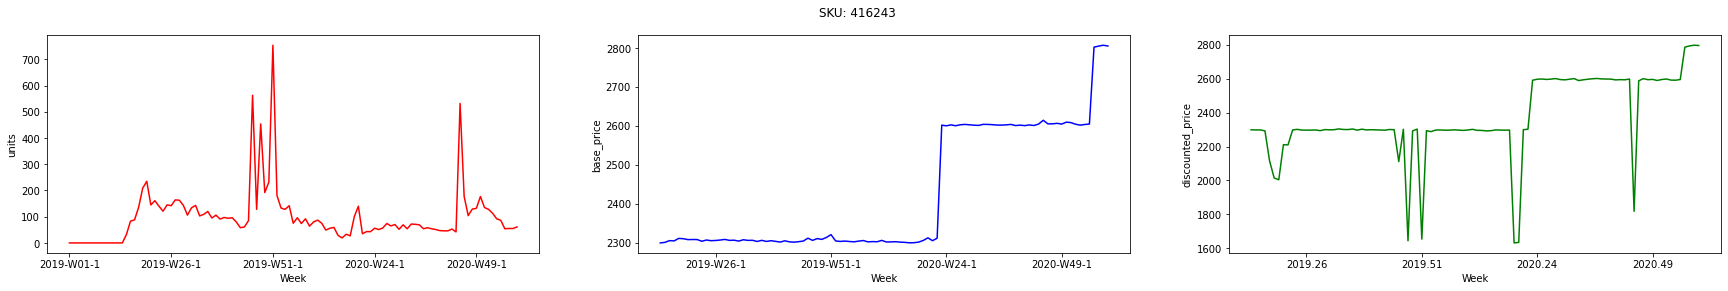

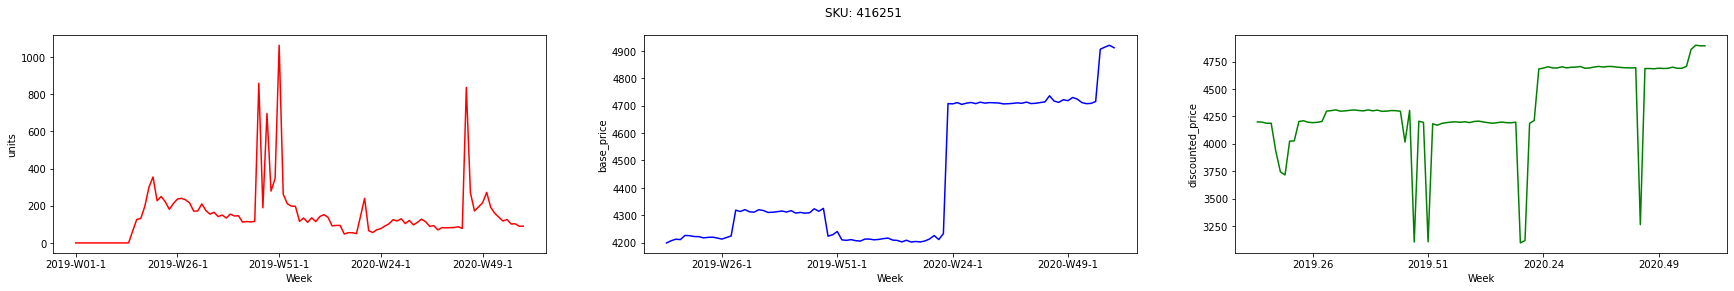

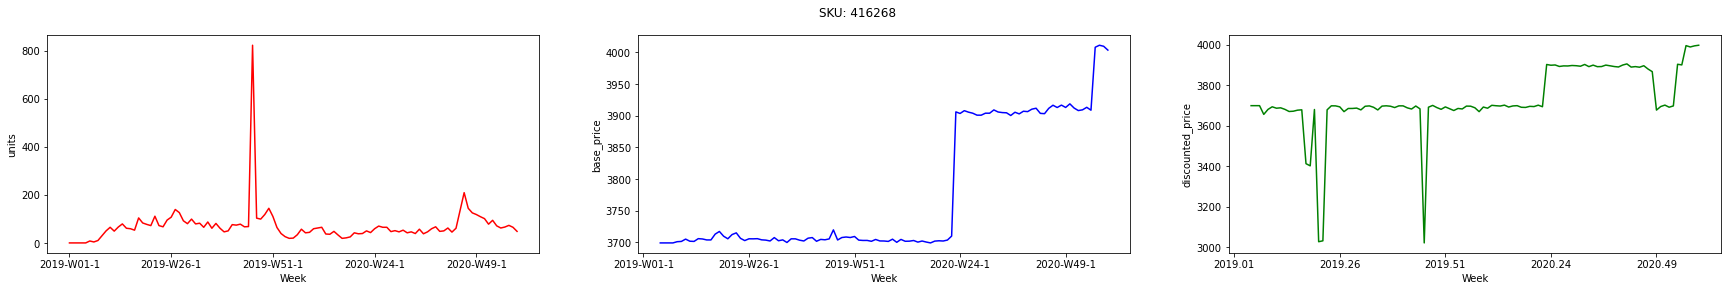

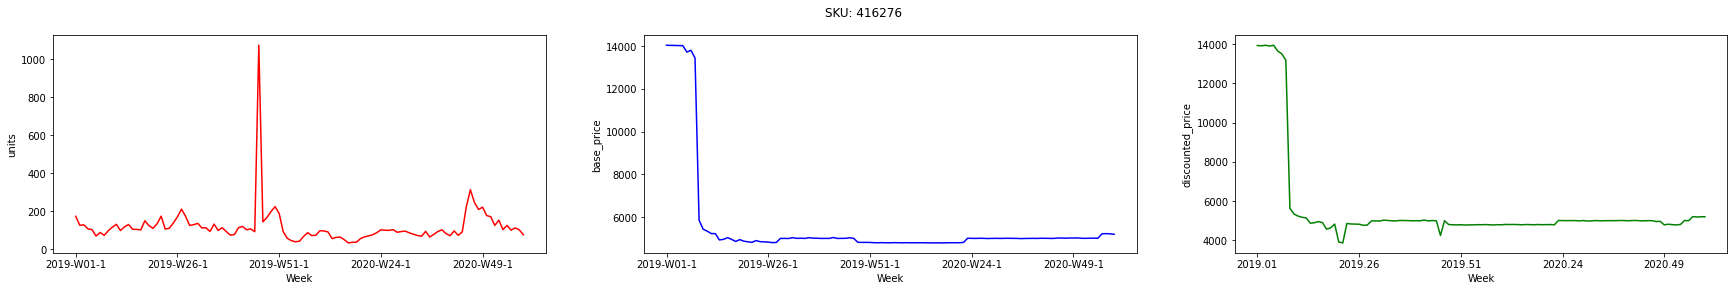

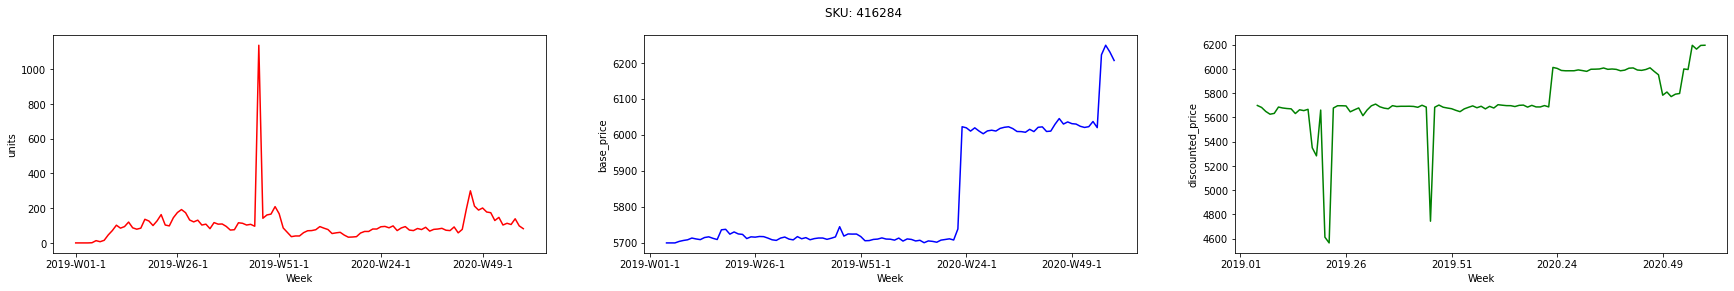

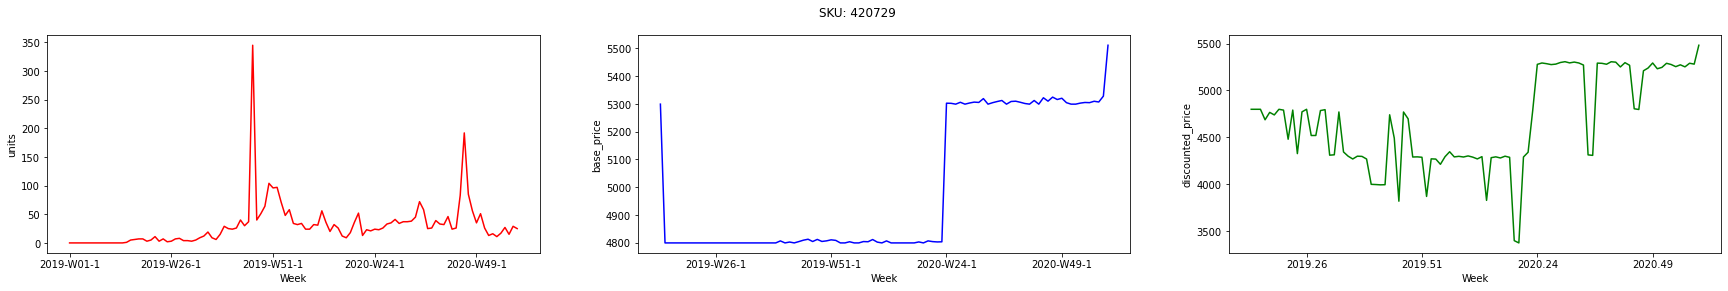

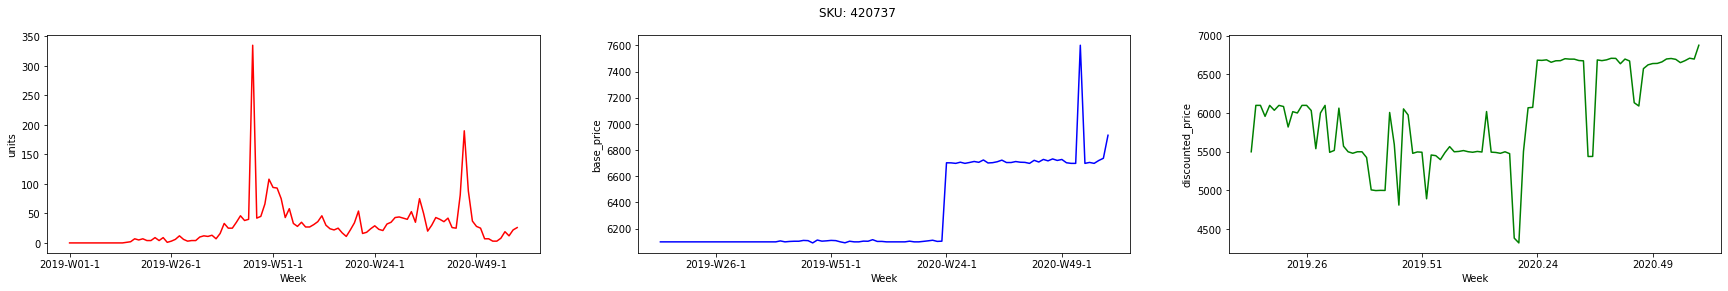

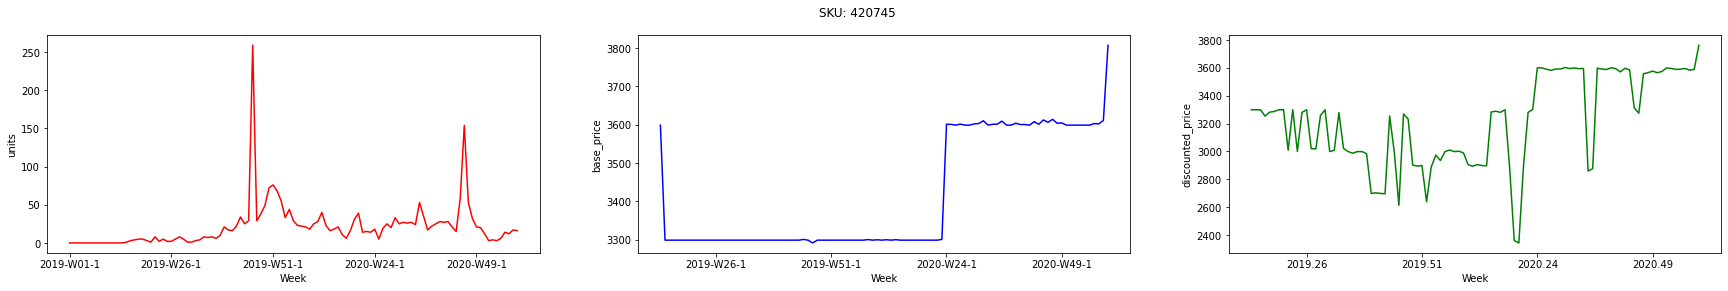

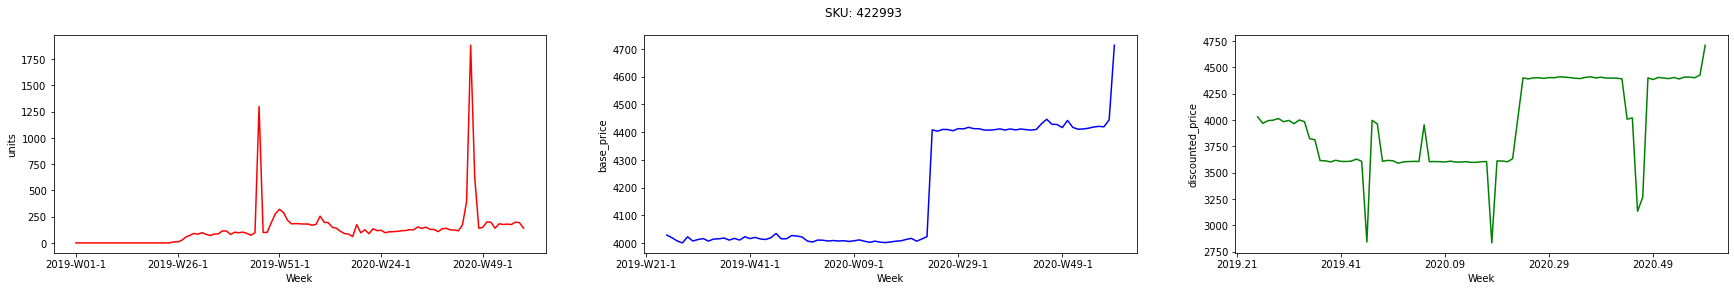

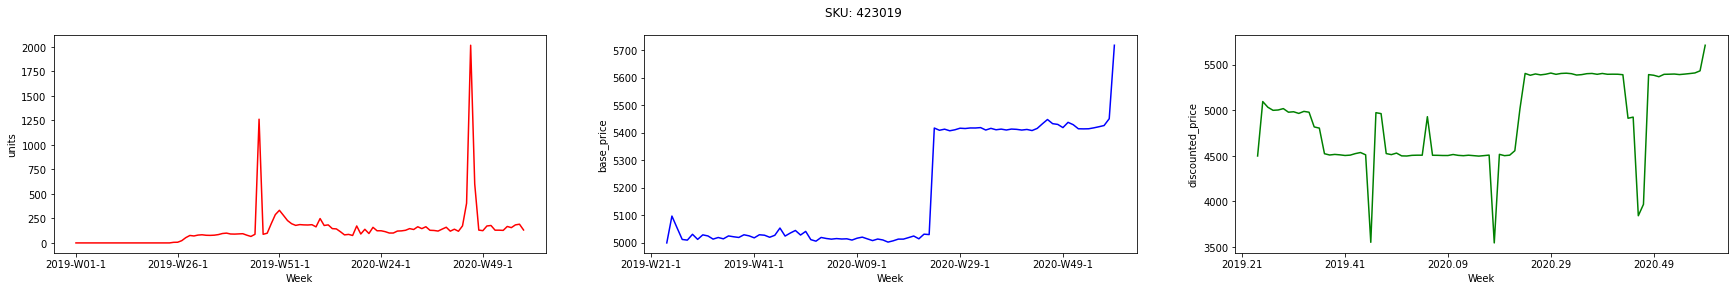

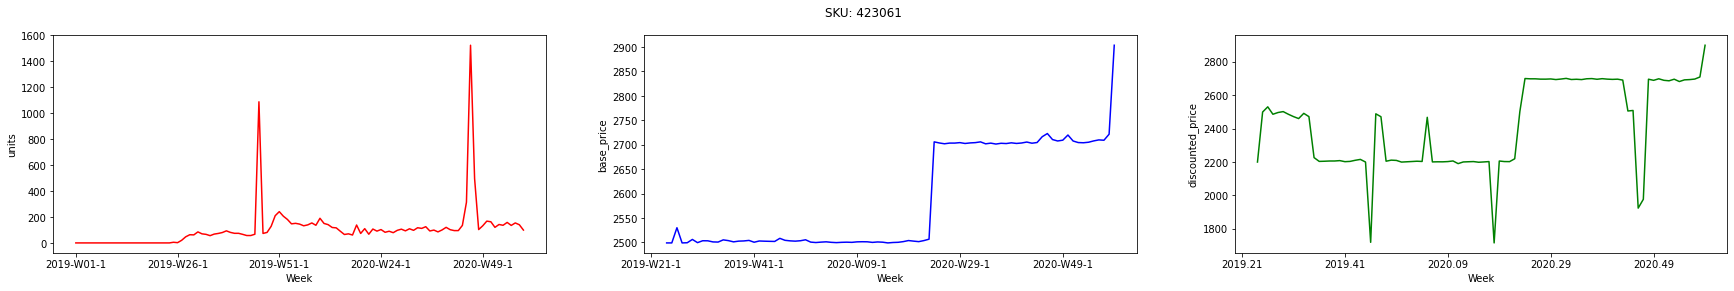

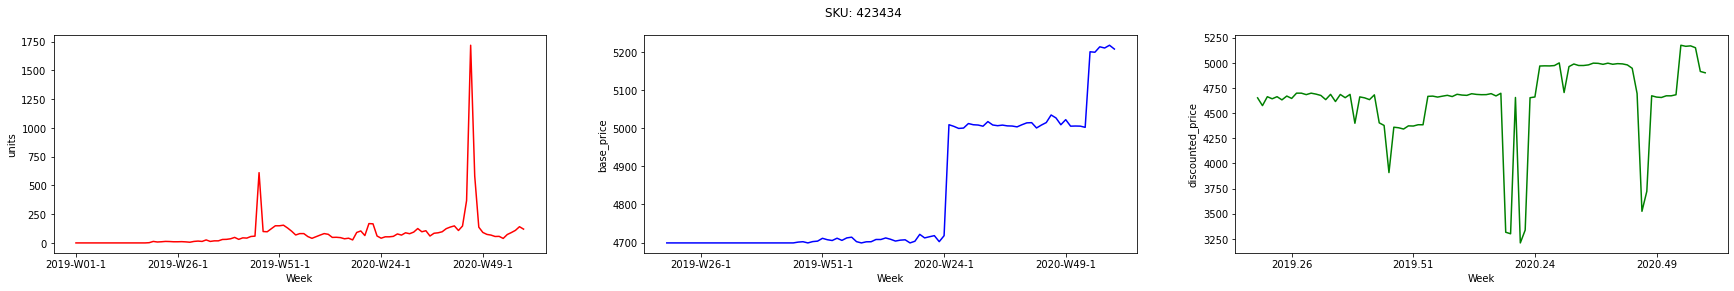

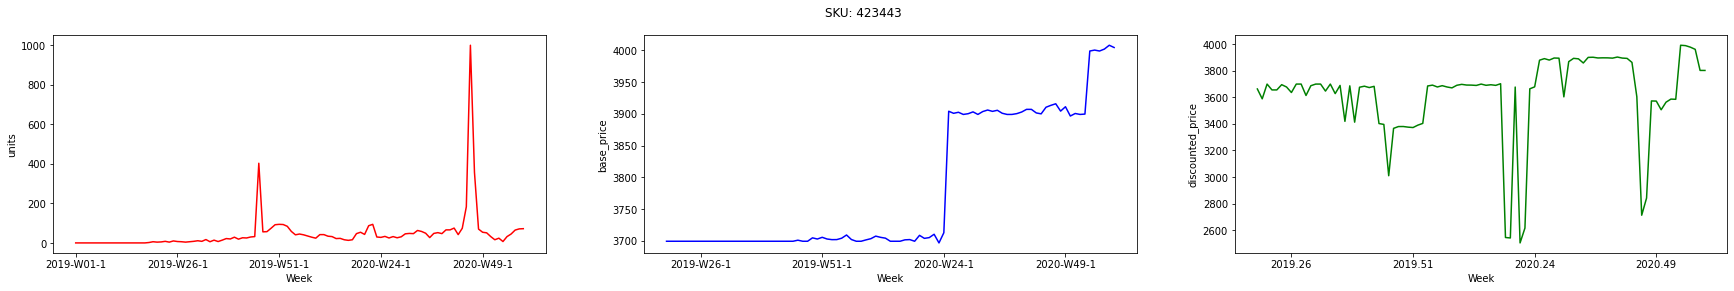

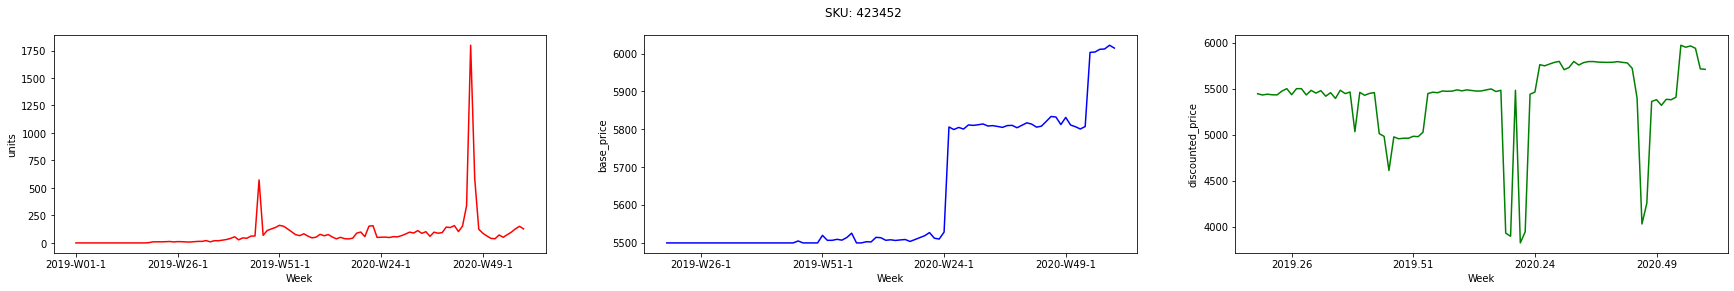

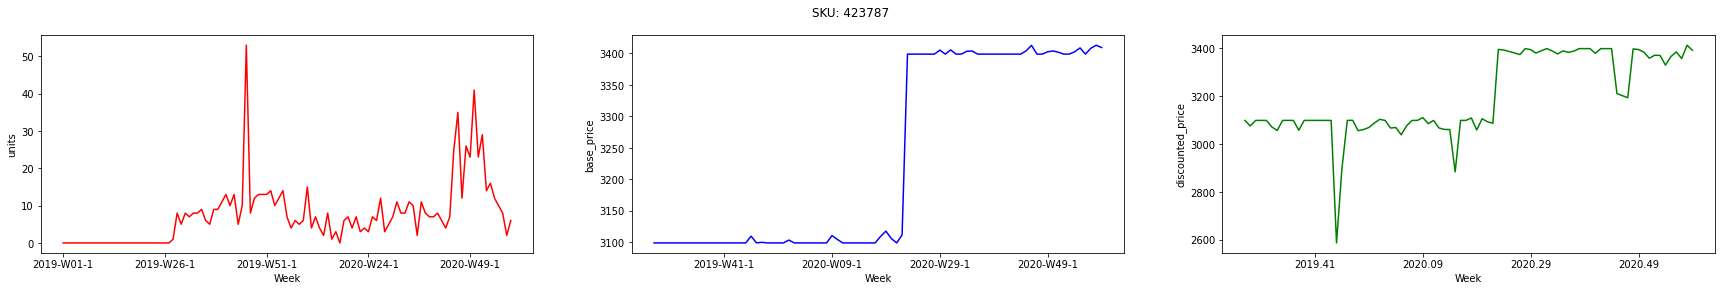

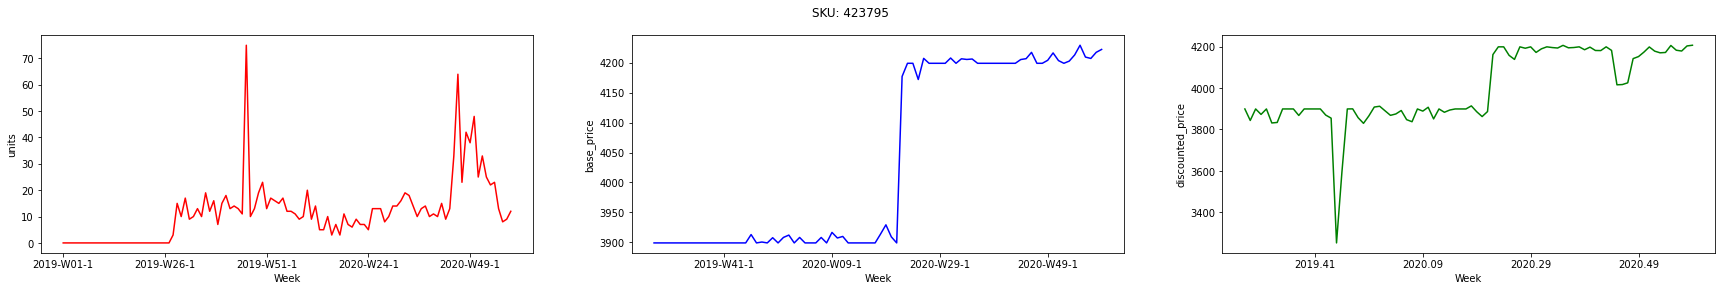

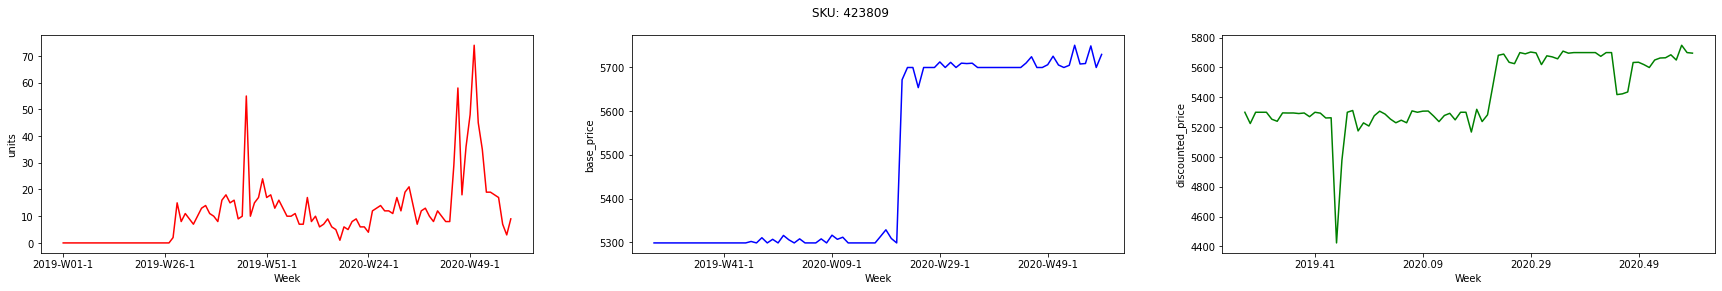

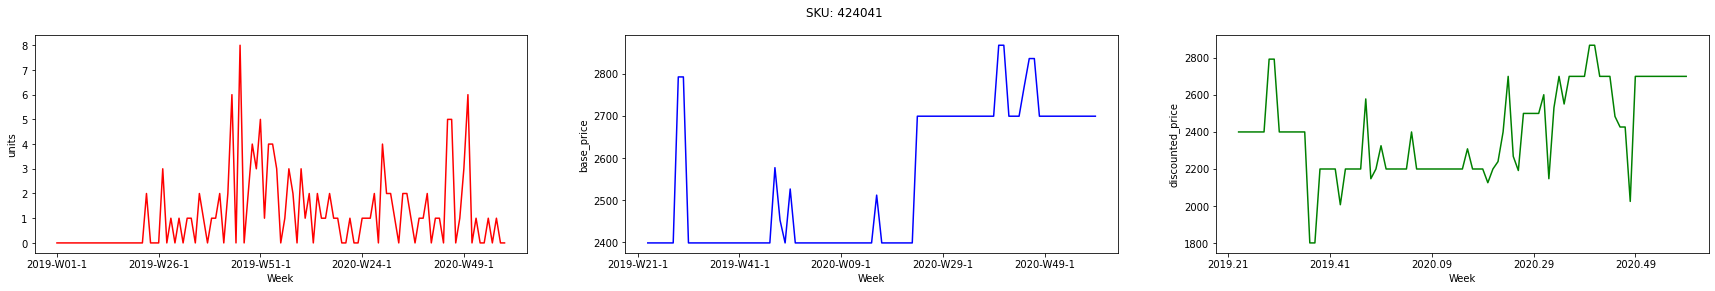

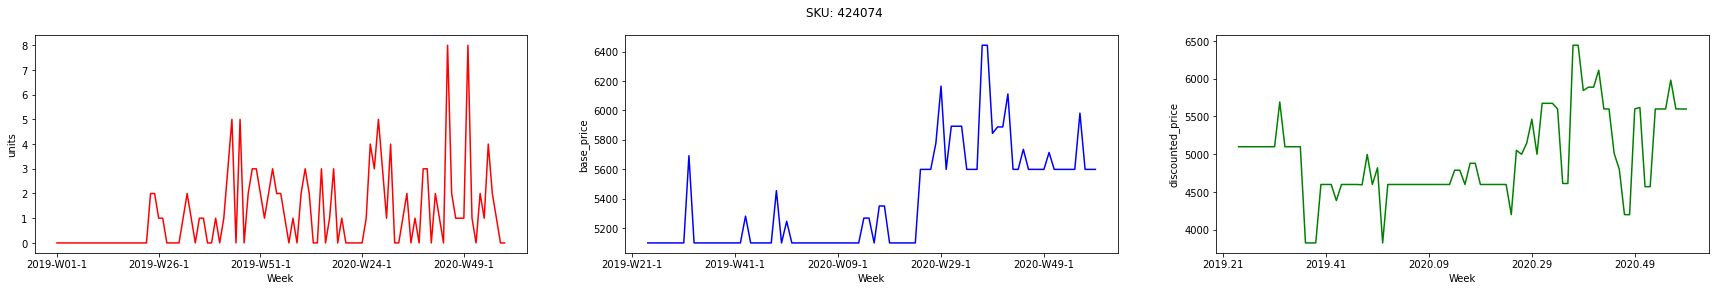

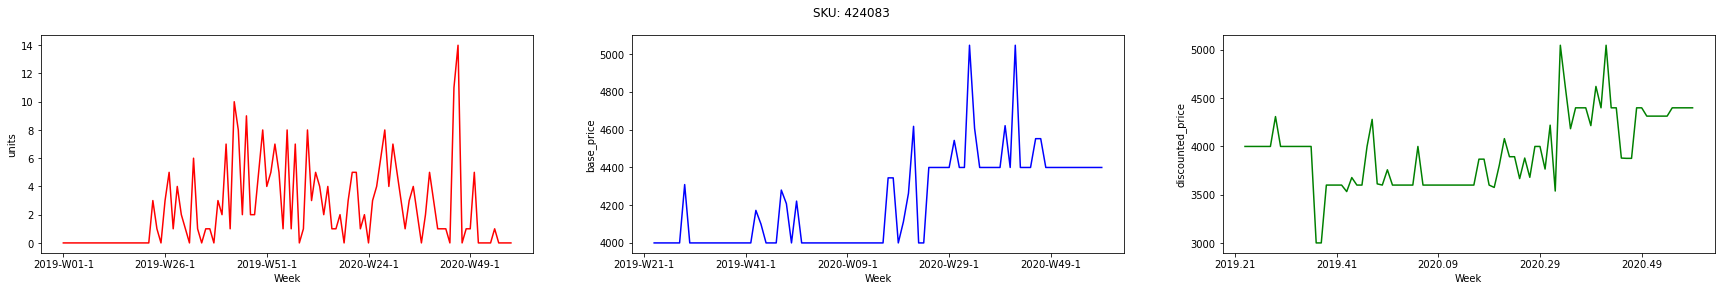

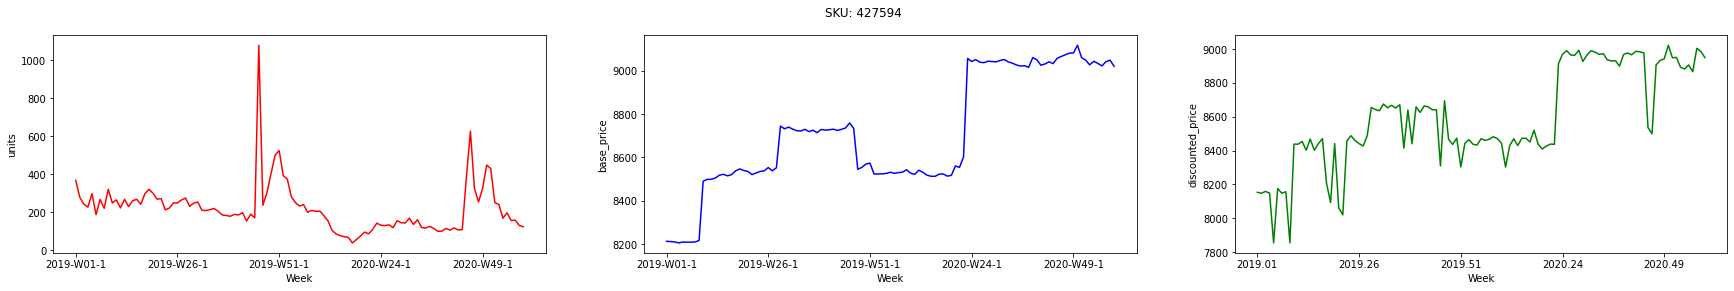

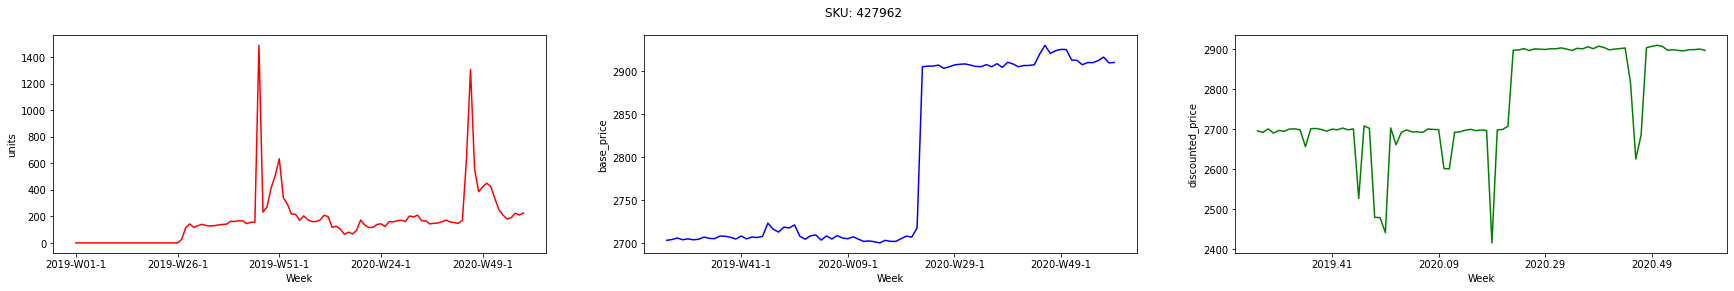

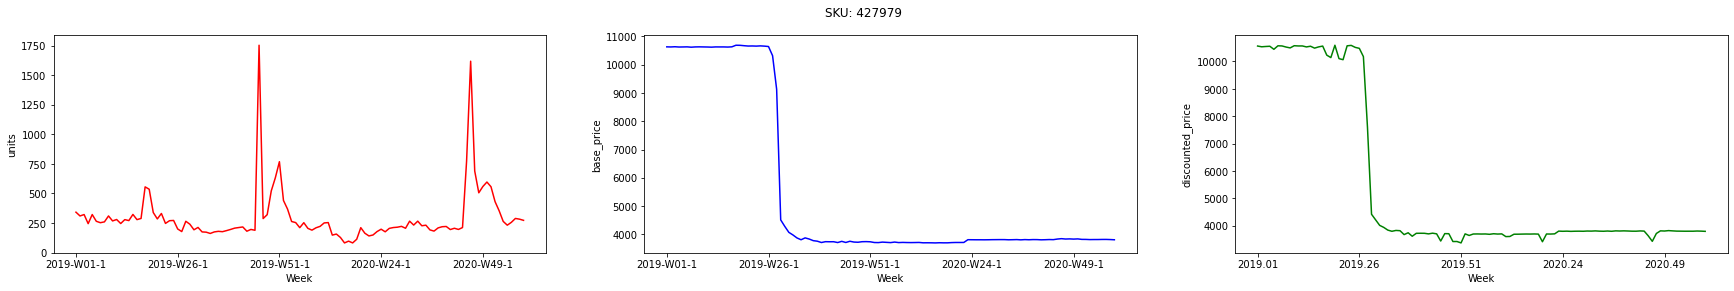

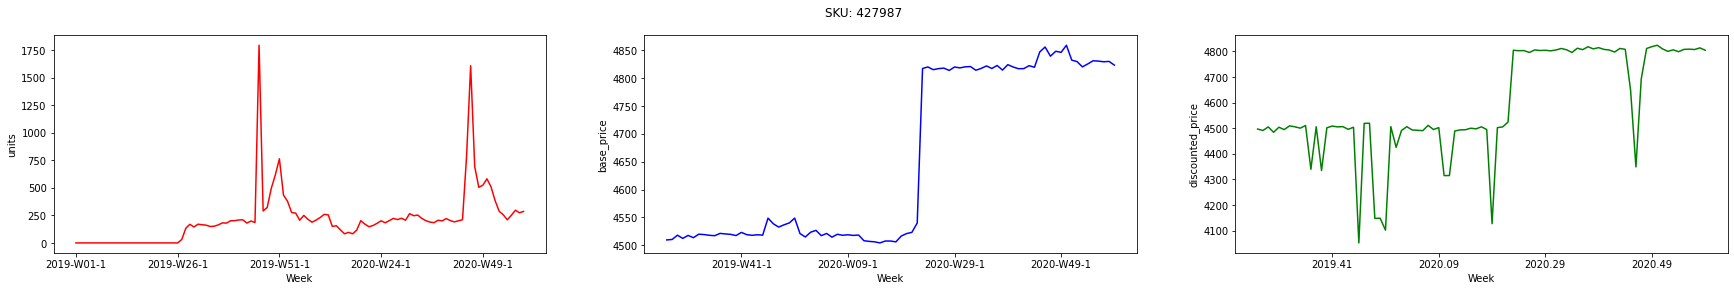

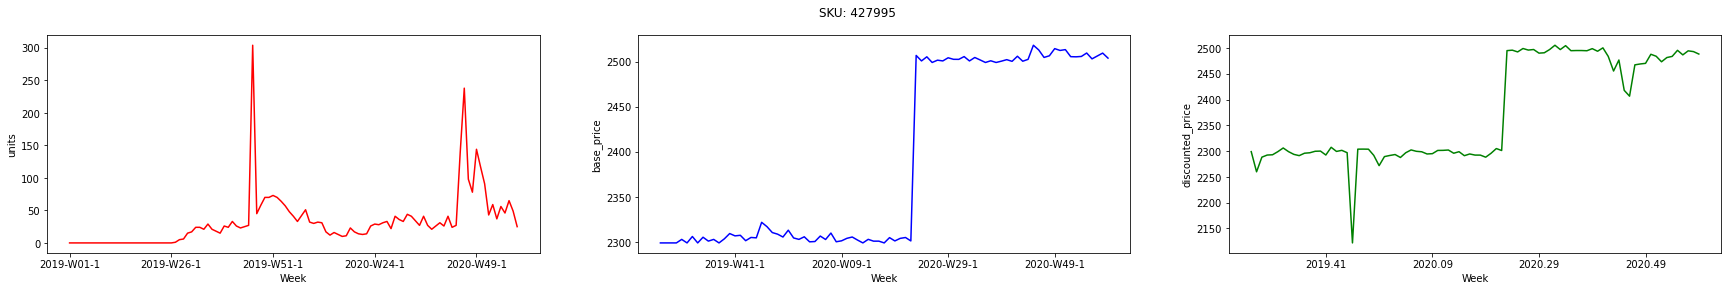

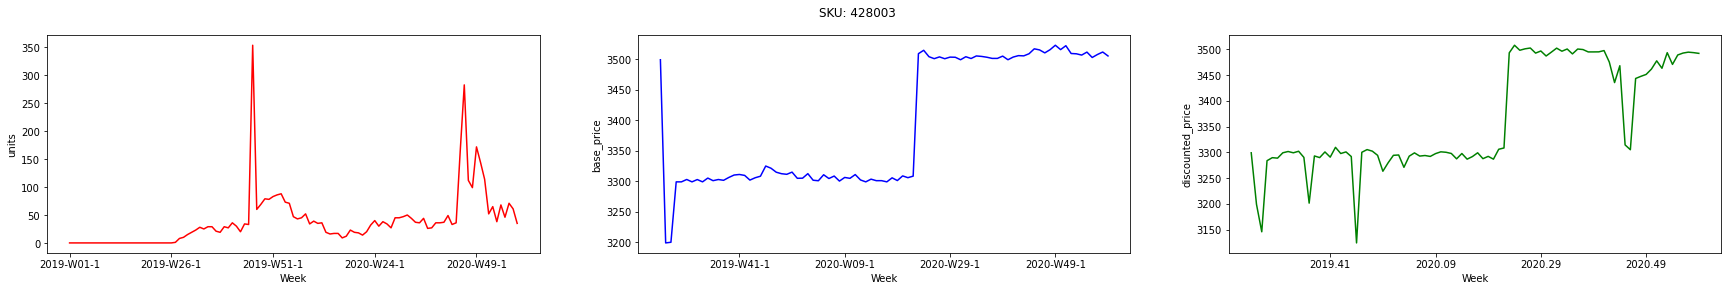

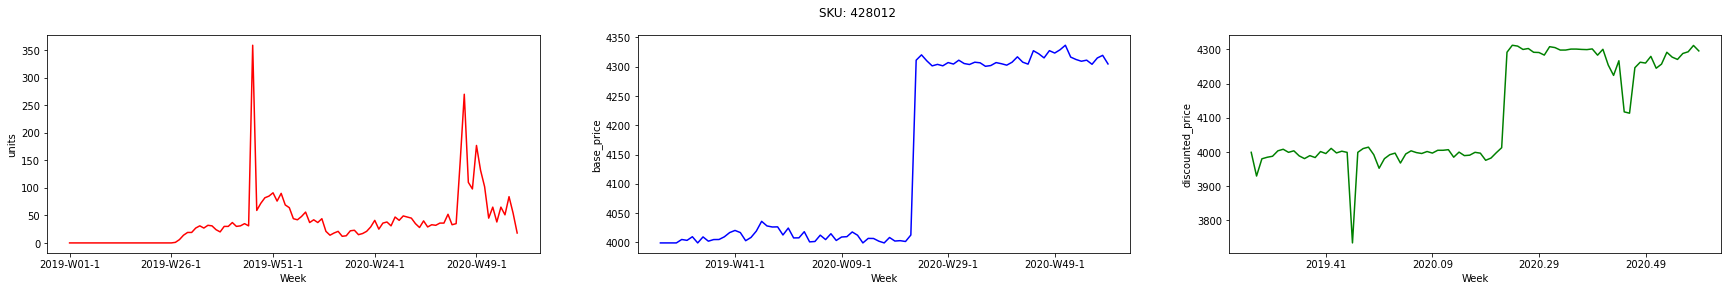

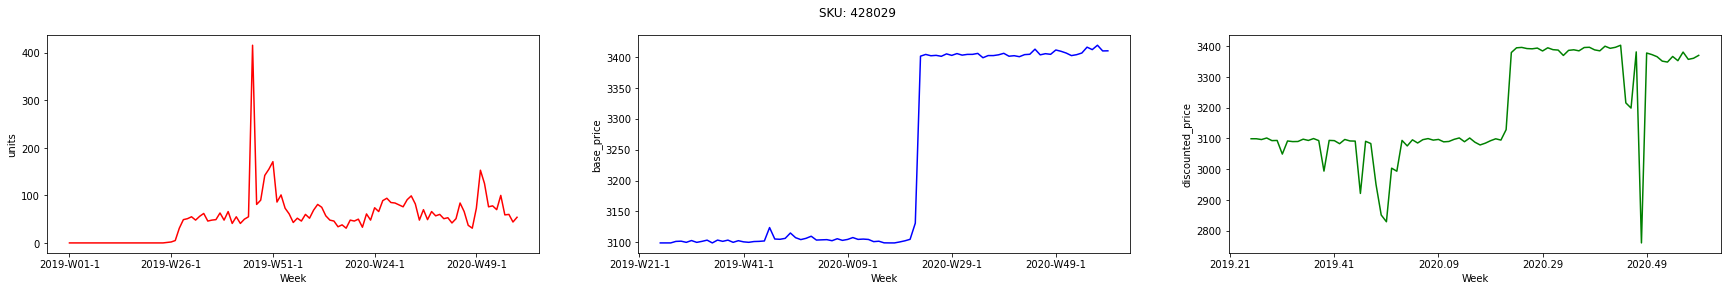

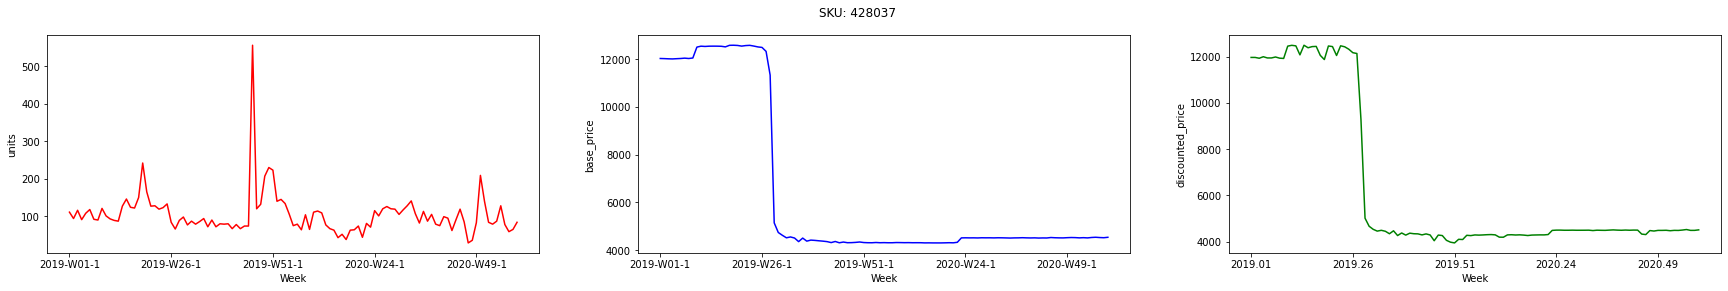

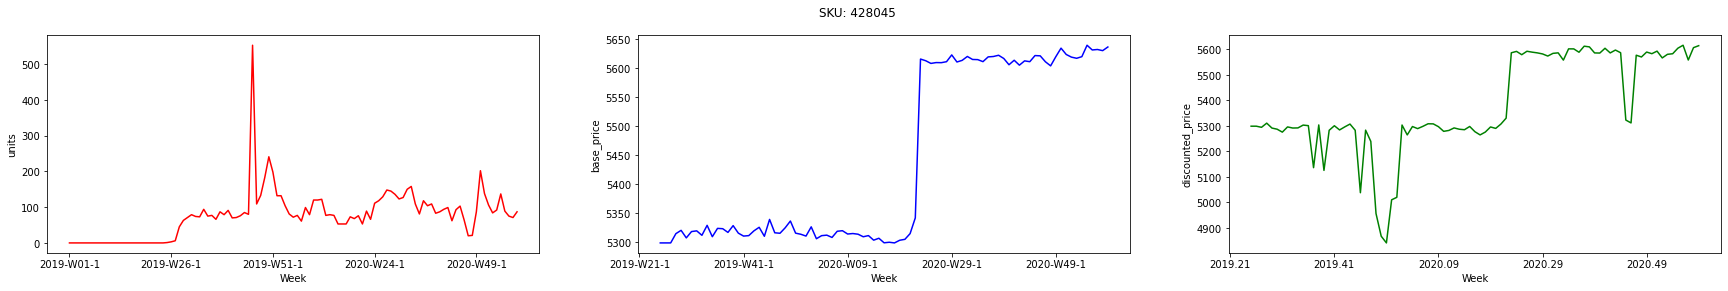

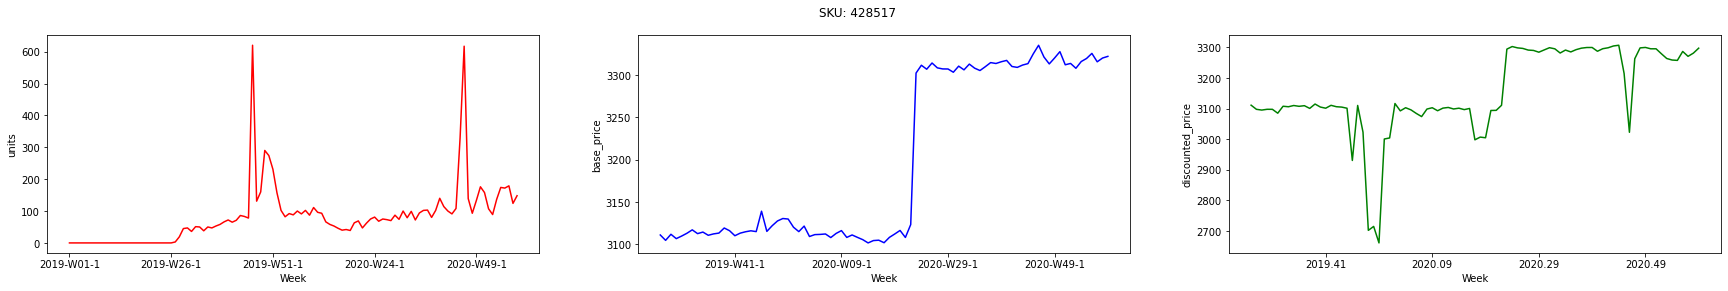

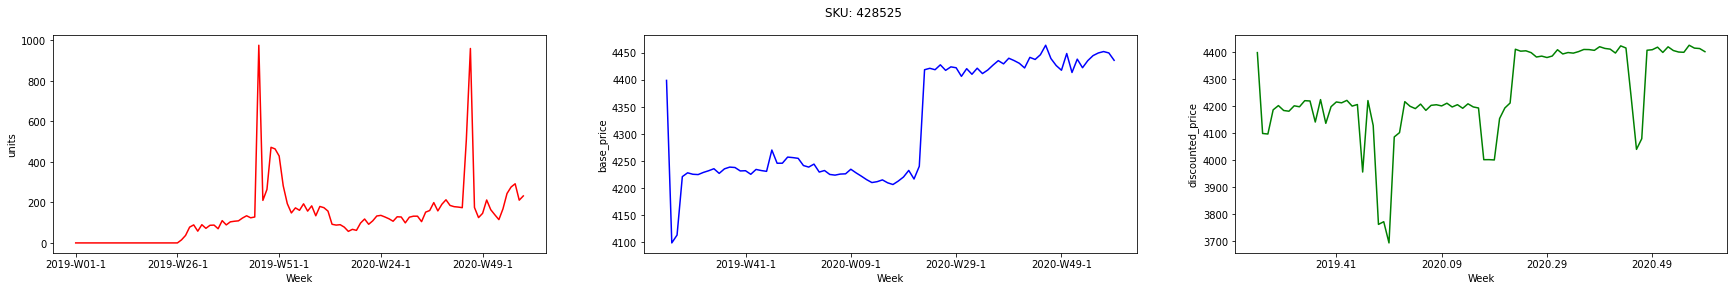

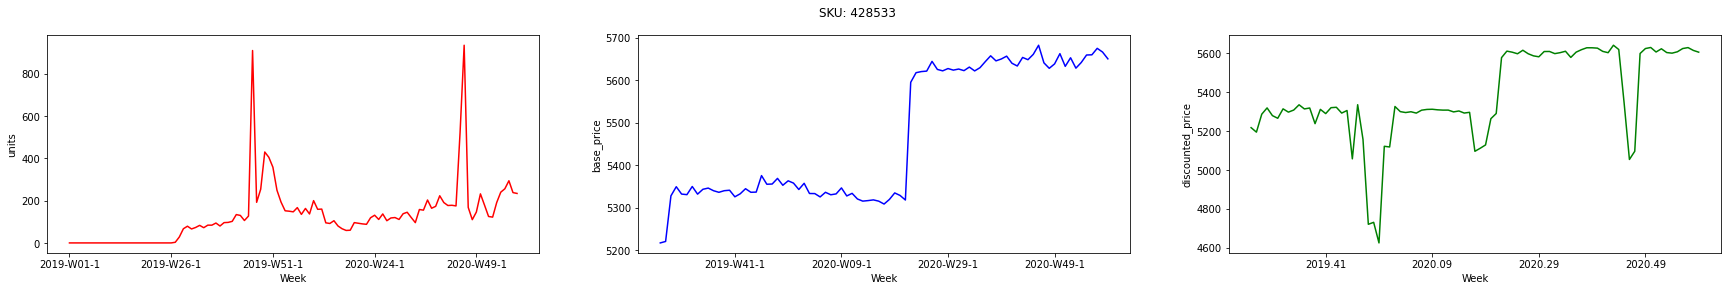

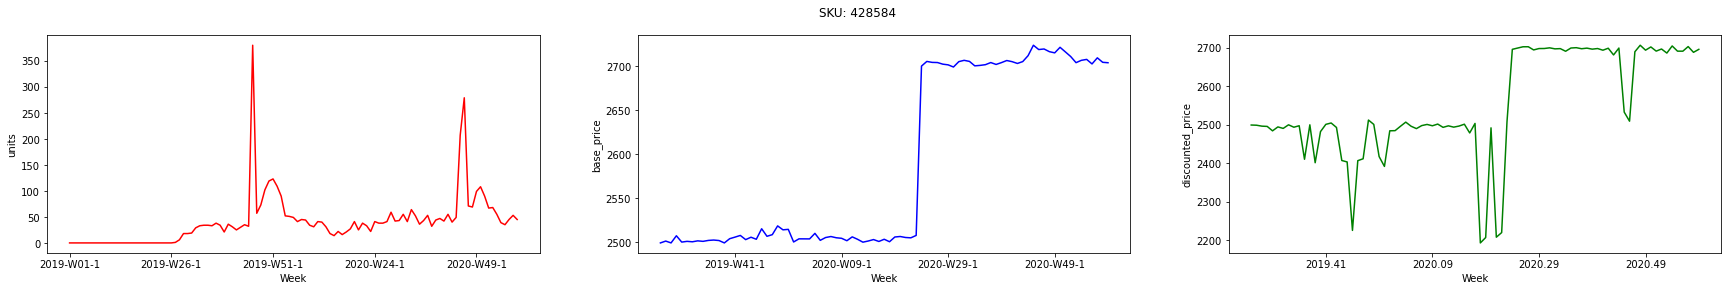

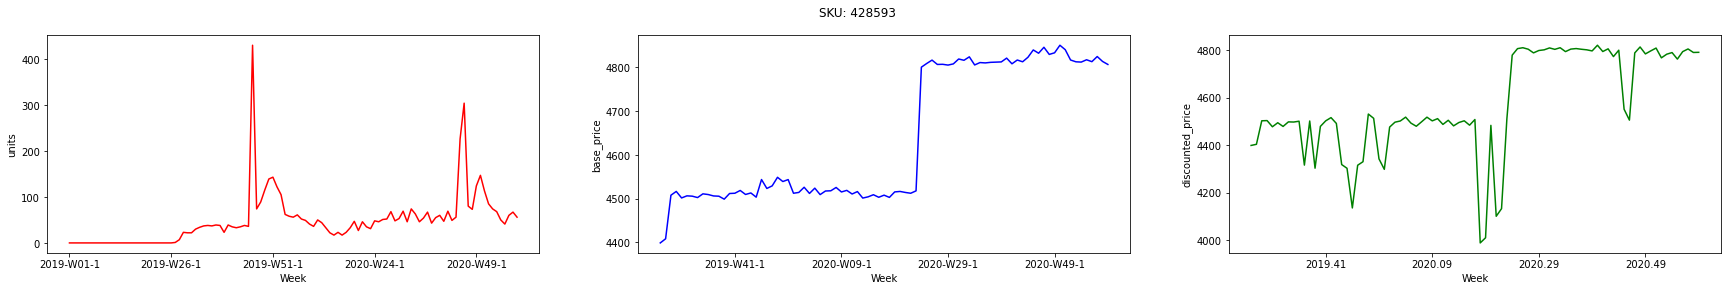

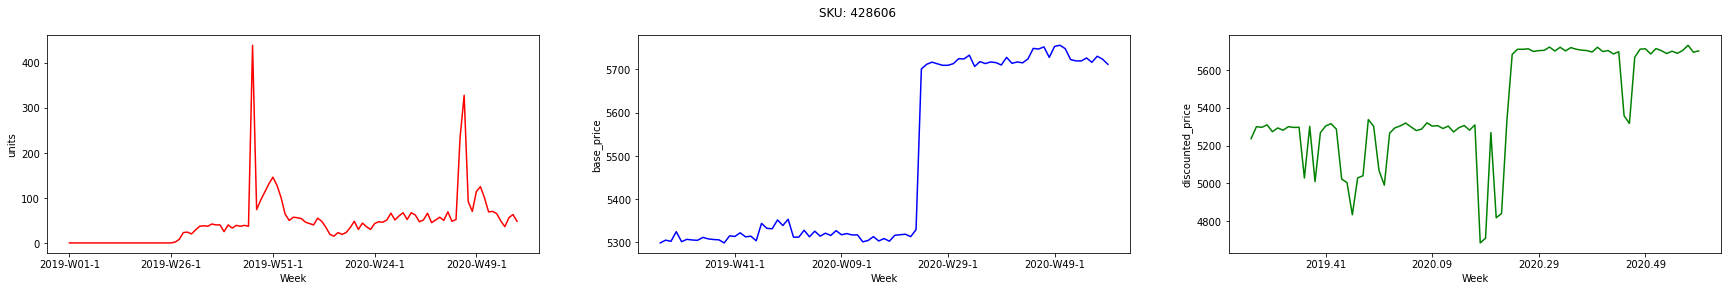

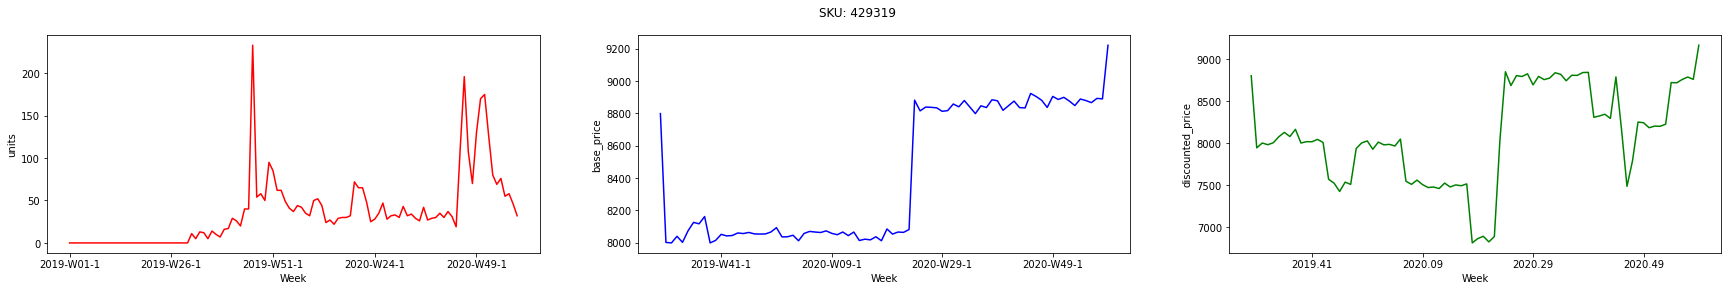

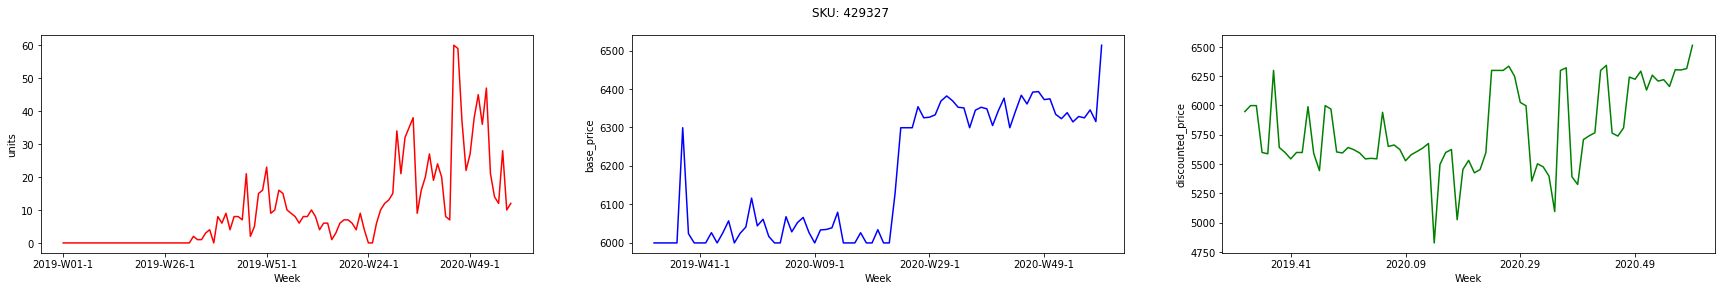

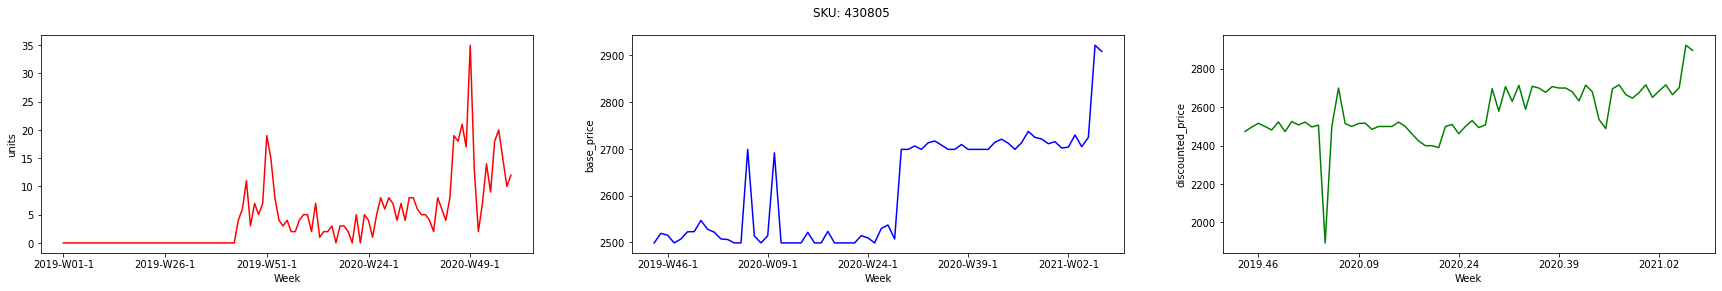

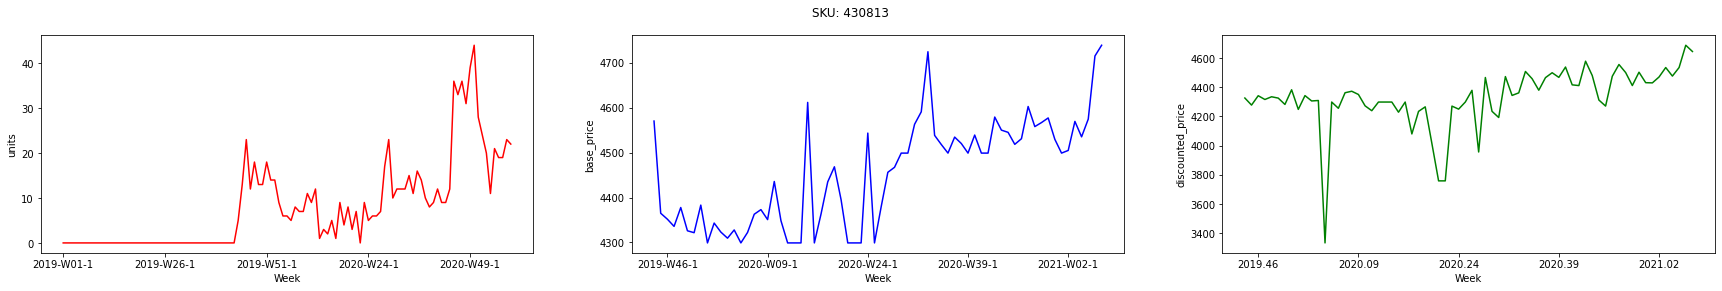

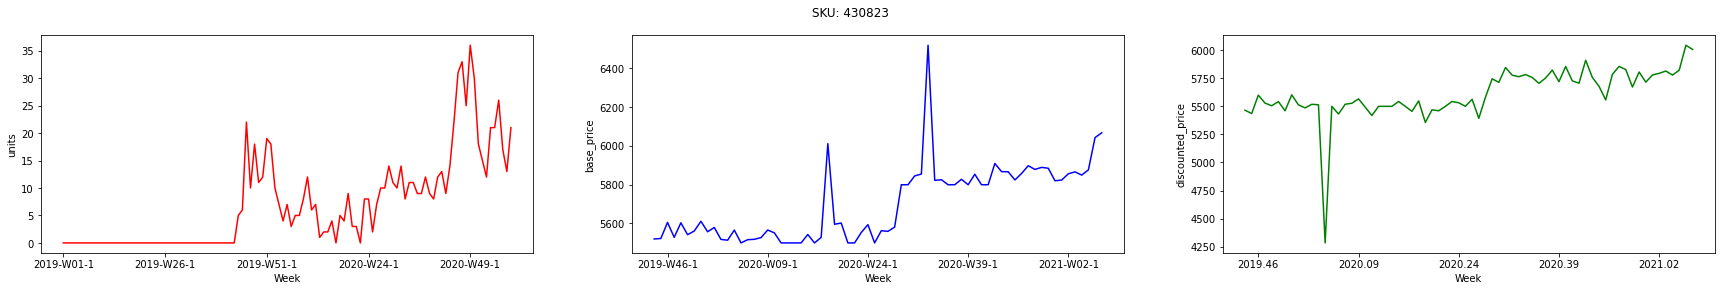

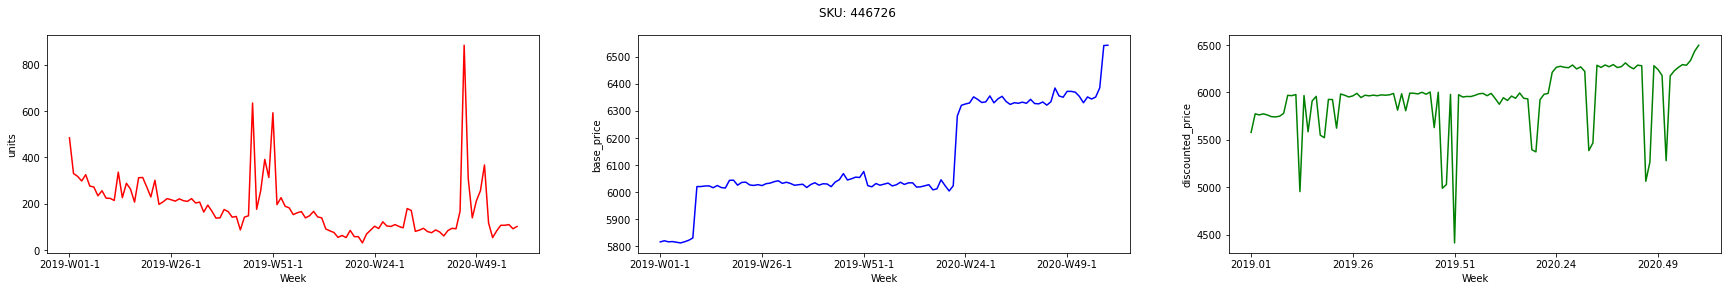

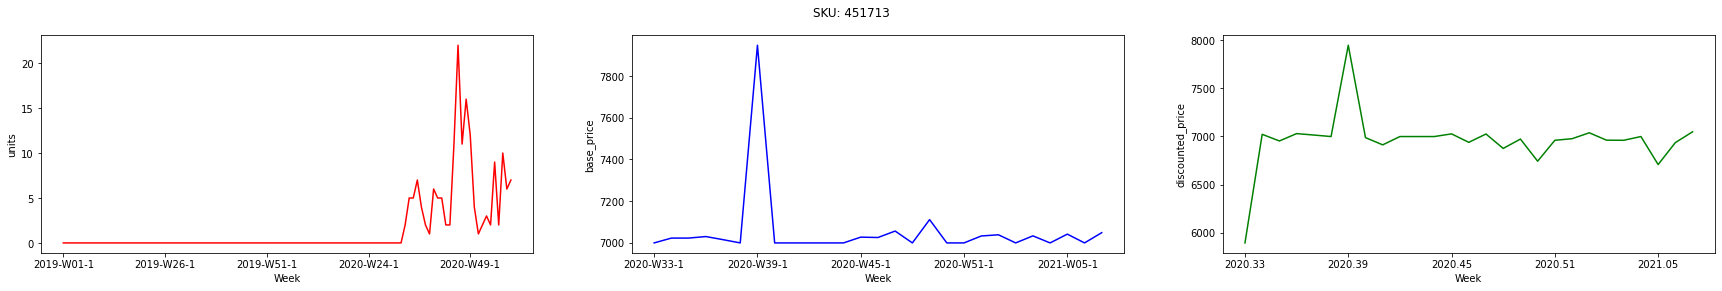

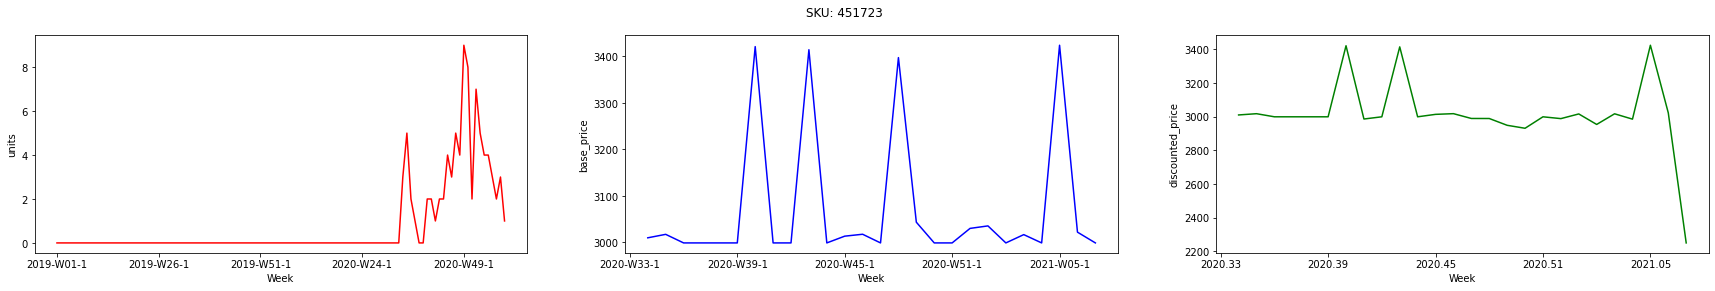

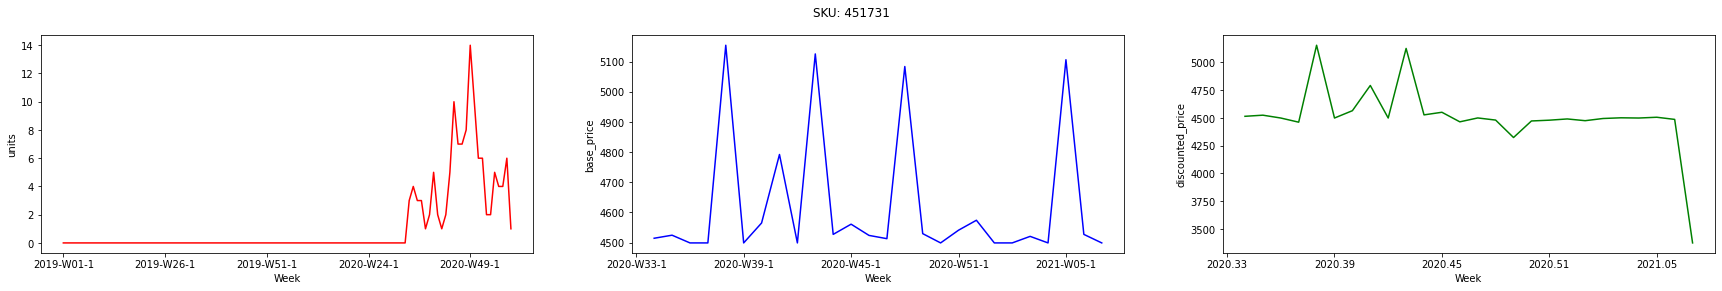

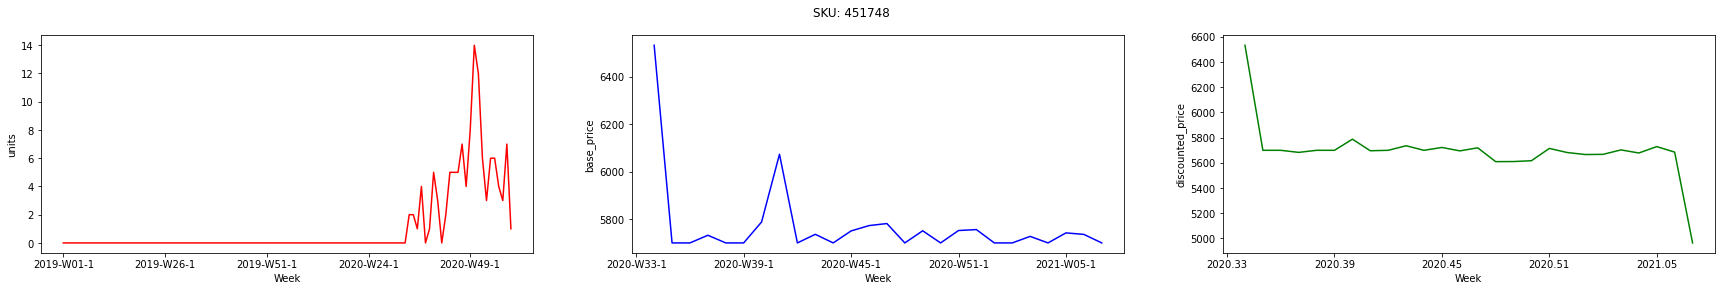

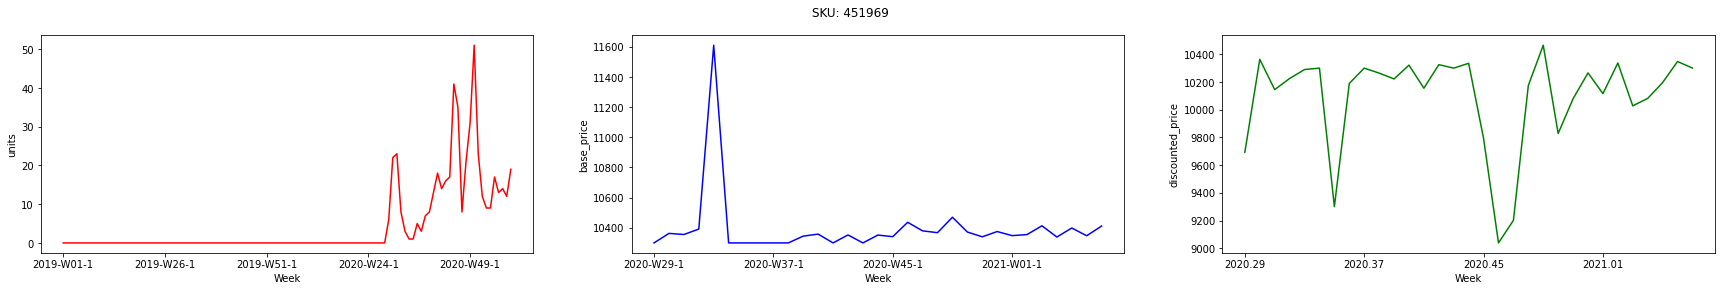

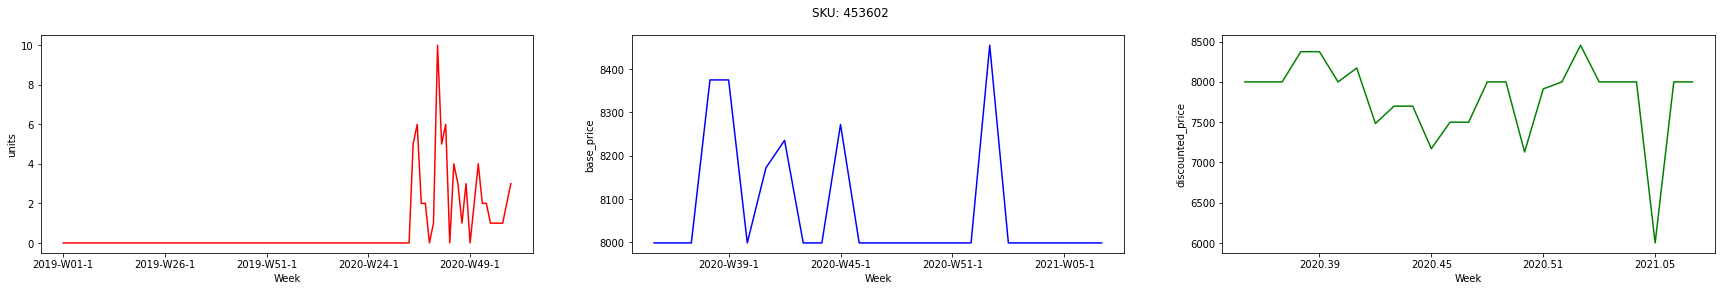

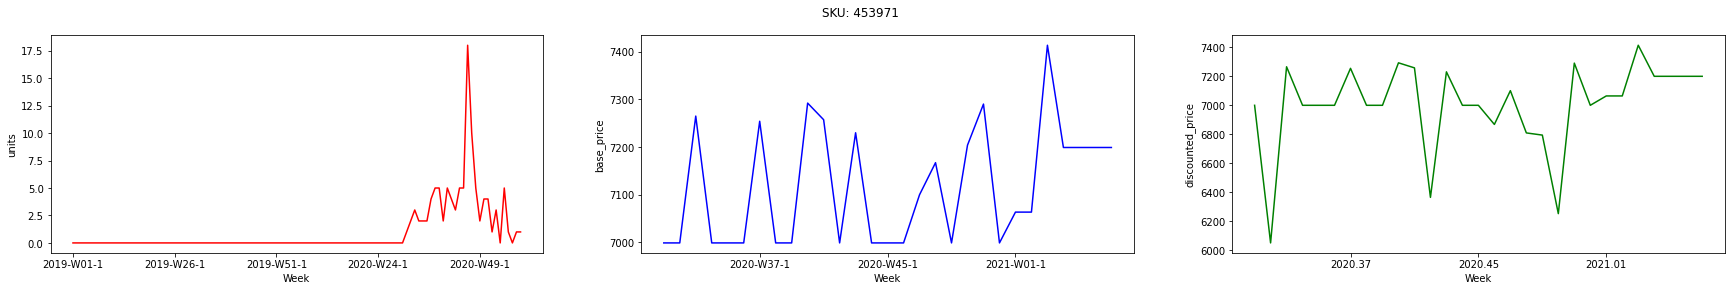

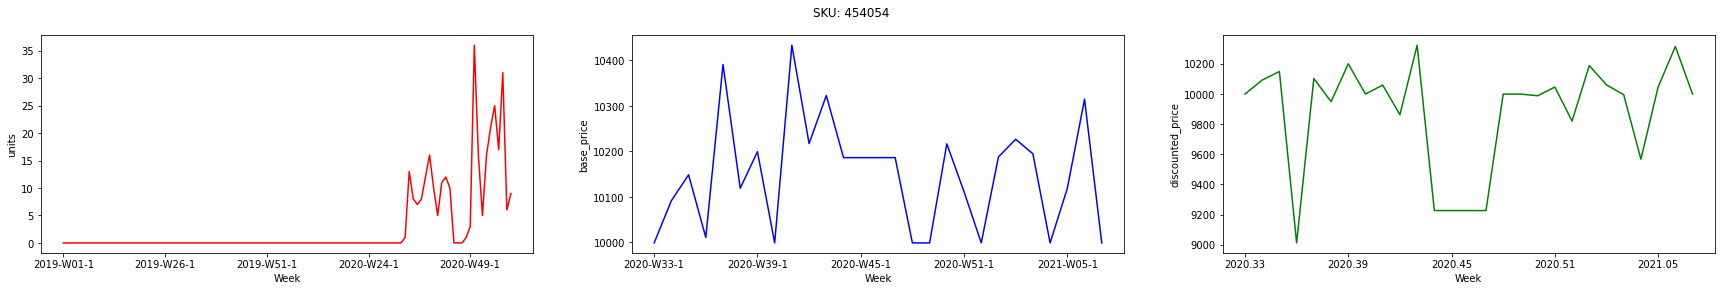

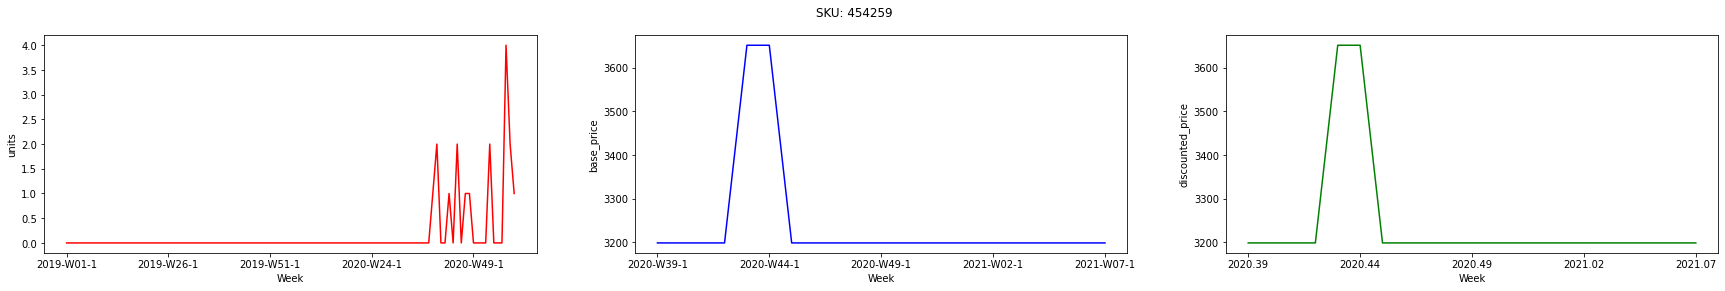

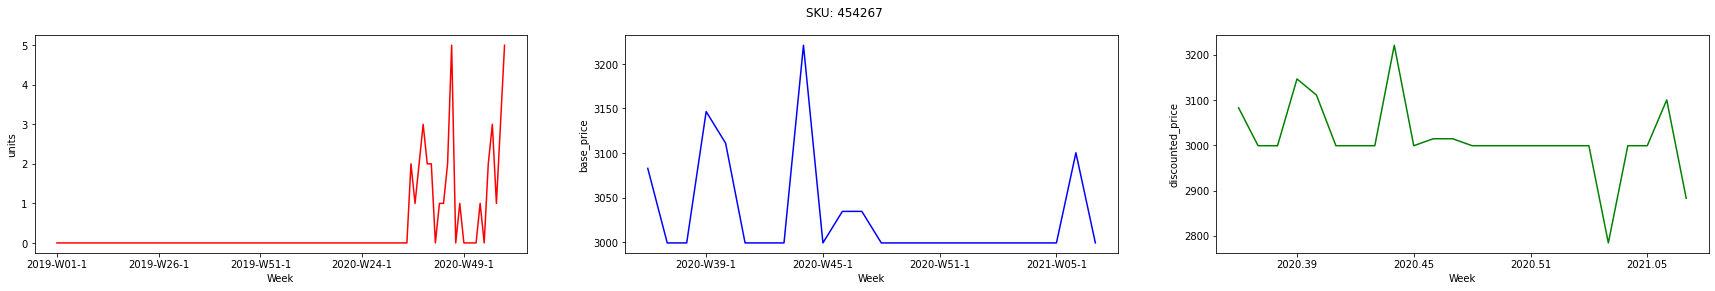

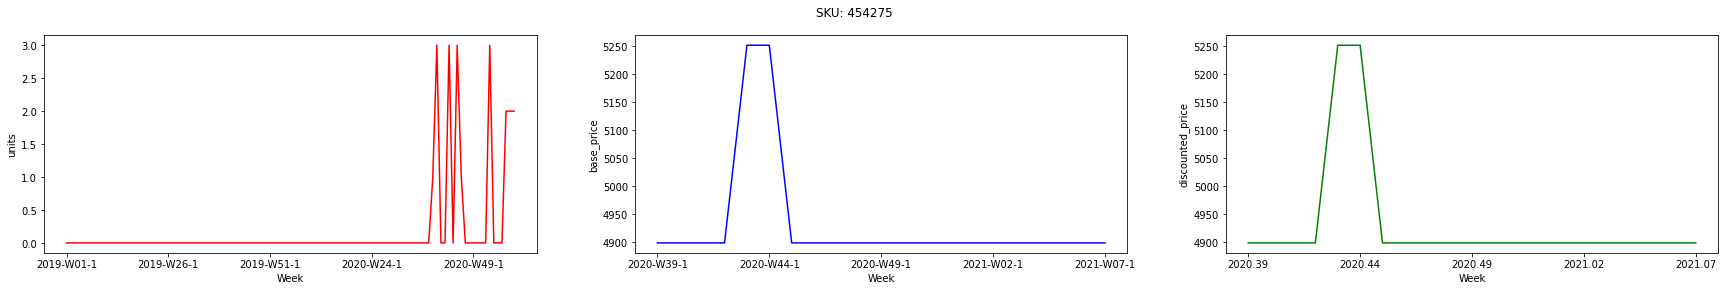

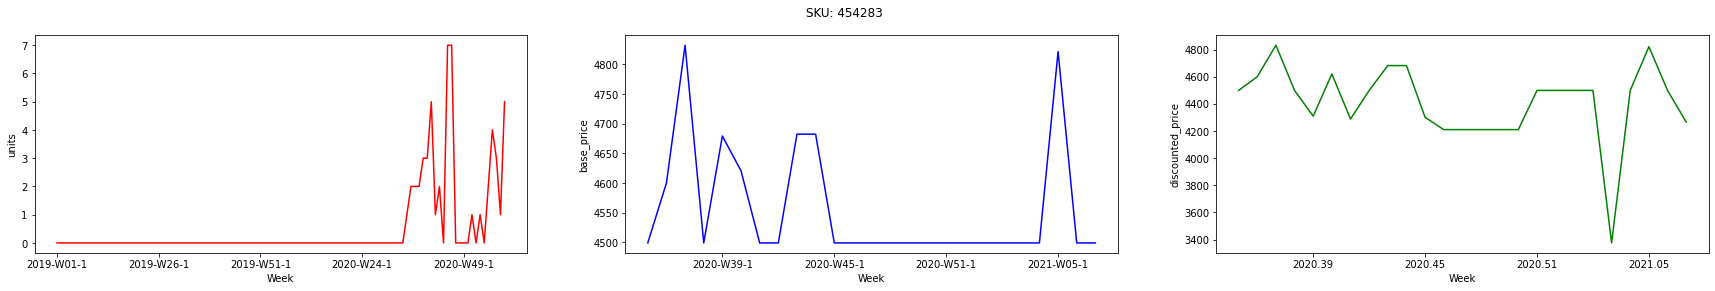

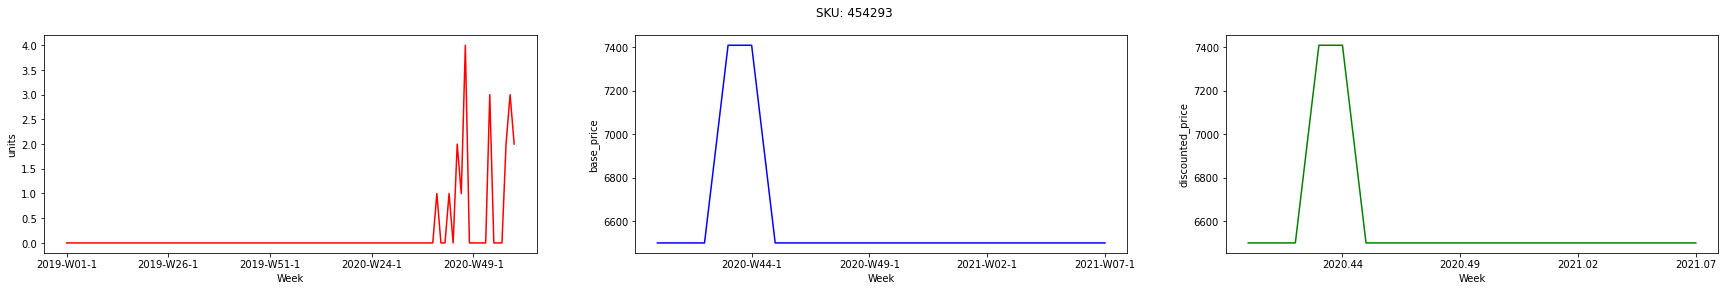

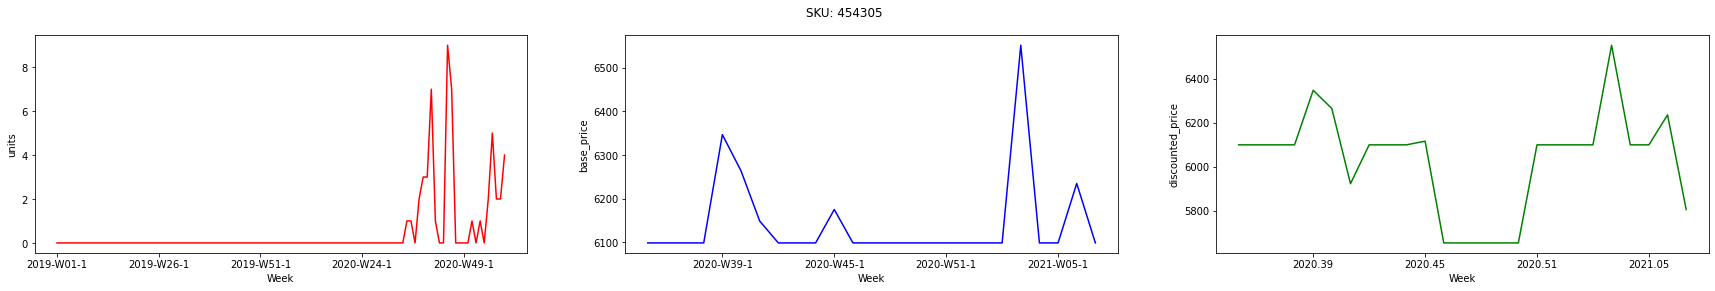

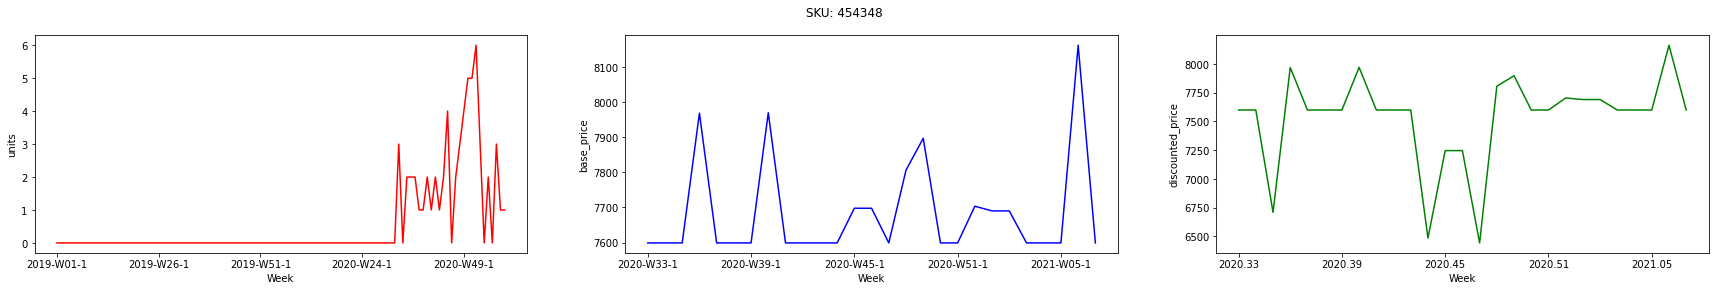

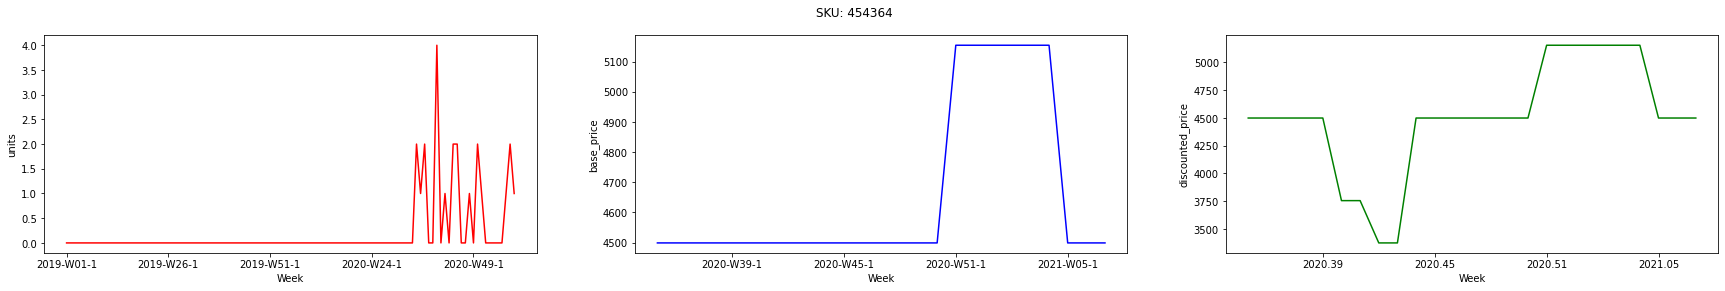

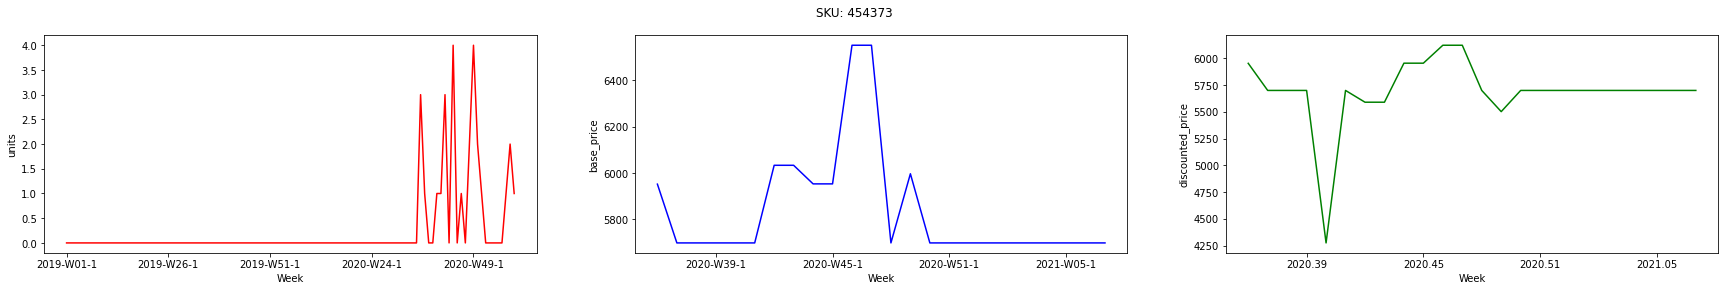

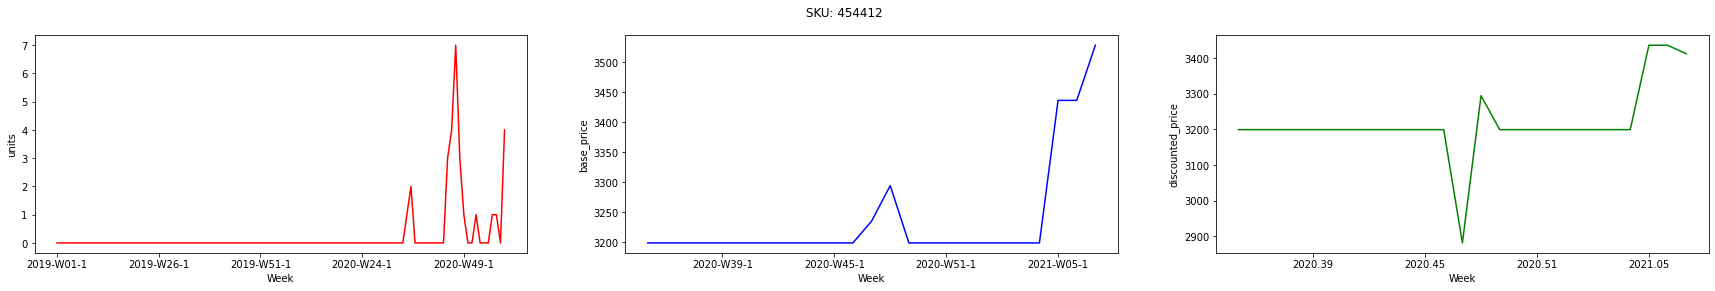

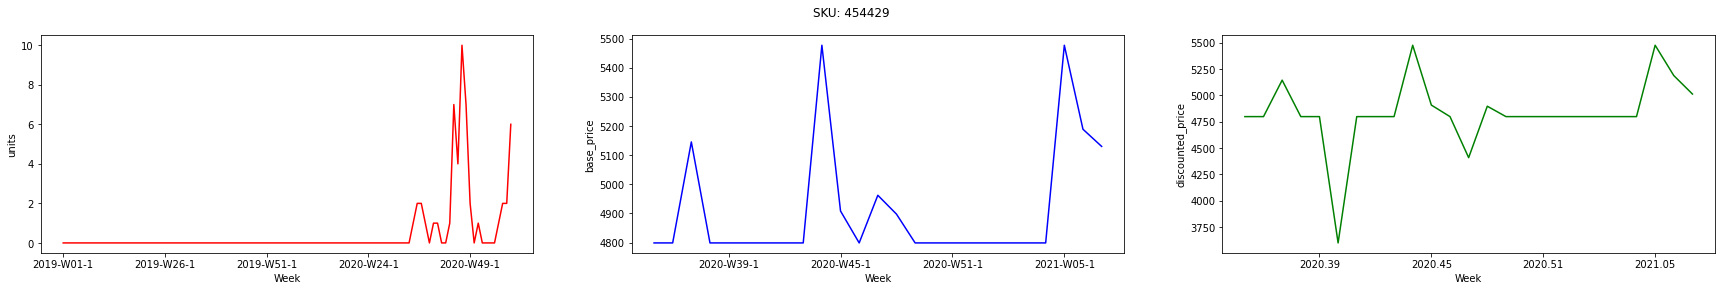

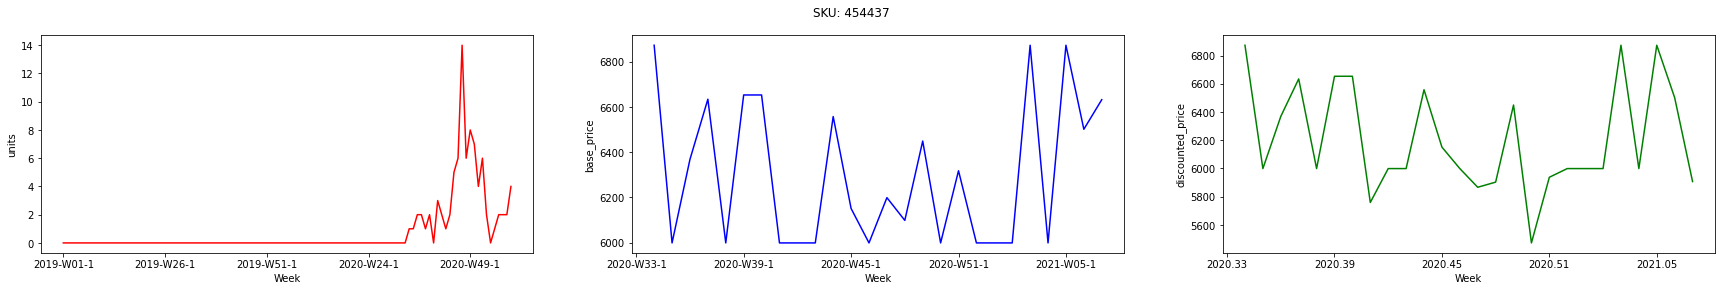

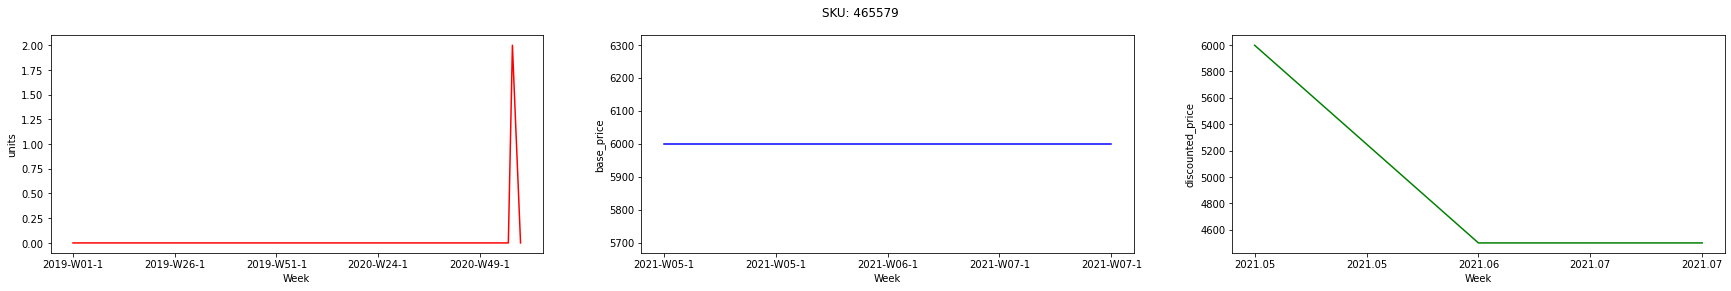

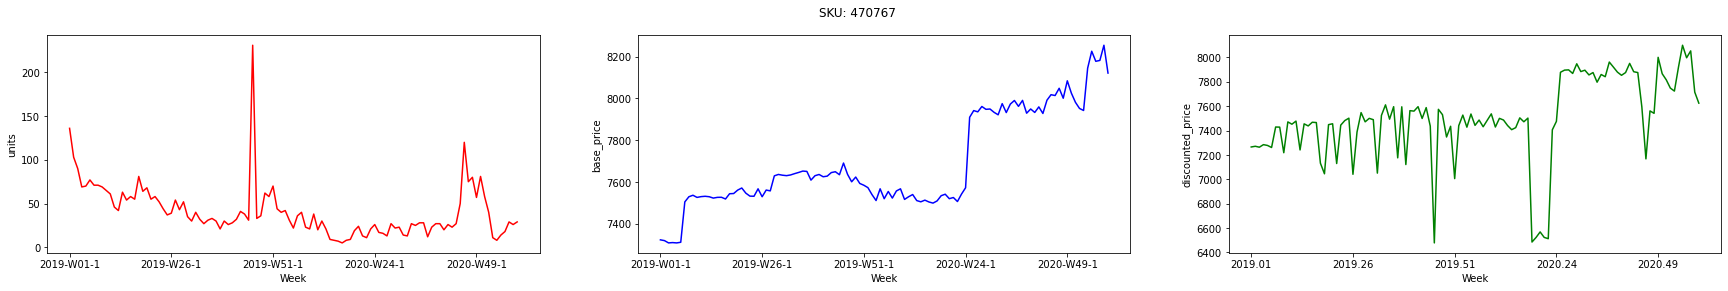

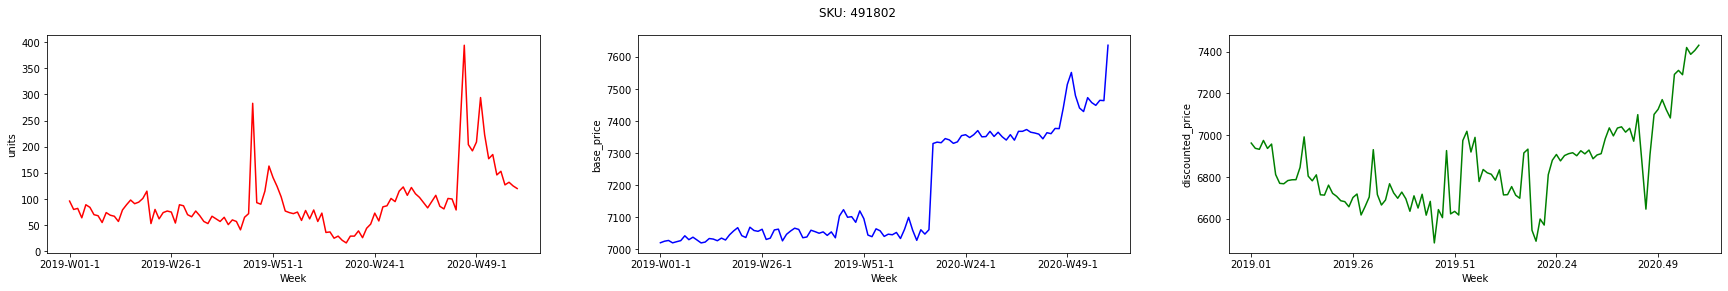

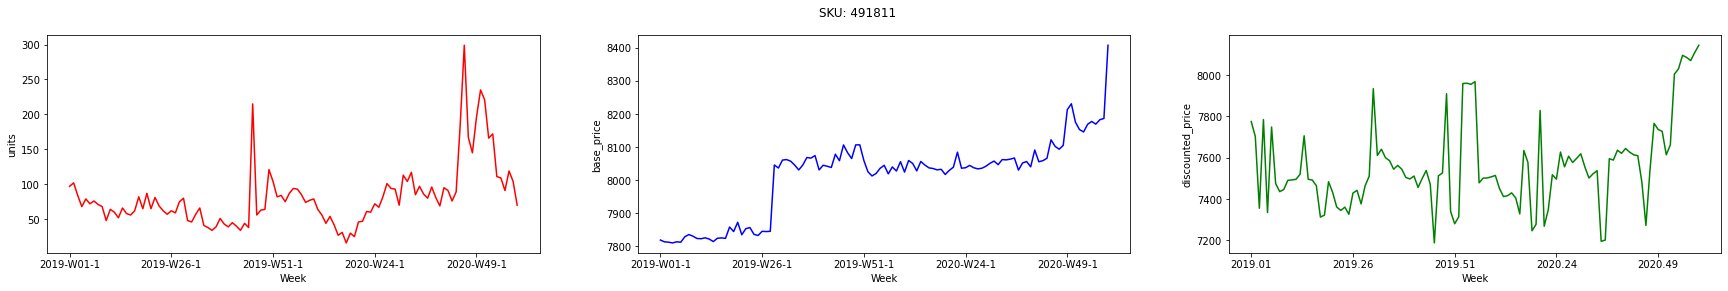

In [28]:
from matplotlib.ticker import MaxNLocator
for sku in df_2.SKU.unique():
  fig, (ax1,ax2,ax3) =plt.subplots(1,3)
  fig.set_size_inches(30,4)
  fig,plt.suptitle('SKU: '+str(sku))

  ax1.plot(df_2.loc[df_2.SKU==sku].ISO, df_2.loc[df_2.SKU==sku].units, c='r')
  ax1.xaxis.set_major_locator(MaxNLocator(5))
  ax1.set_xlabel('Week')
  ax1.set_ylabel('units')

  ax2.plot(df_2.loc[df_2.SKU==sku].ISO, df_2.loc[df_2.SKU==sku].base_price, c='b')
  ax2.xaxis.set_major_locator(MaxNLocator(5))
  ax2.set_xlabel('Week')
  ax2.set_ylabel('base_price')

  ax3.plot(df_2.loc[df_2.SKU==sku].Week, df_2.loc[df_2.SKU==sku].discounted_price, c='g')
  ax3.xaxis.set_major_locator(MaxNLocator(5))
  ax3.set_xlabel('Week')
  ax3.set_ylabel('discounted_price')




## 5. Descriptive Statistics

In [29]:
# We can have an idea of the behaviour of each variable when using the 'describe()' method in pandas. 
#It is commonly important to know the average values of each variable, the dispersion that exists with respect to the mean value (through the variance or standard deviation),
# the minimum and maximum values. Other measures to consider may be bias and kurtosis.
df_2.describe()

SKU         COST  ...   total_units      DC
count    8991.000000  8991.000000  ...   8991.000000  8991.0
mean   431391.555556  2189.369753  ...   5646.063063   401.0
std     20281.207096   810.567199  ...   4624.307807     0.0
min    401343.000000  1025.000000  ...   1949.000000   401.0
25%    420729.000000  1559.500000  ...   3836.000000   401.0
50%    428003.000000  2010.000000  ...   4590.000000   401.0
75%    451748.000000  2585.000000  ...   5388.000000   401.0
max    491811.000000  4474.000000  ...  38708.000000   401.0

[8 rows x 7 columns]

## 6. Variable creation

In a first step, a variable that you want to create from the existing columns is a new variable that gives us the discount percentage for each SKU. To achieve this, the discount percentage is calculated by the difference of the base price variable and the discounted price variable.

A second step is to create dummy variables from string data like brand, style and size.

In [30]:
df_2['discount_percentage']= ((df_2.base_price-df_2.discounted_price)/df_2.base_price)*100
df_2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Week     SKU    COST  ...       Date         ISO  discount_percentage
260  2019.01  401343  1808.0  ... 2018-12-31  2019-W01-1             0.387389
261  2019.02  401343  1808.0  ... 2019-01-07  2019-W02-1             0.633211
262  2019.03  401343  1808.0  ... 2019-01-14  2019-W03-1             1.097610
263  2019.04  401343  1808.0  ... 2019-01-21  2019-W04-1             0.811628
264  2019.05  401343  1808.0  ... 2019-01-28  2019-W05-1             0.571781

[5 rows x 38 columns]

In [31]:
# Transform string variables to dummies
df_2 = pd.get_dummies(df_2, columns=['BRAND','MODEL','SIZE','STYLE'])
df_2.head()

Week     SKU    COST  ...  SIZE_LOVESEAT  STYLE_CLASSIC  STYLE_CONTEMPORARY
260  2019.01  401343  1808.0  ...              1              0                   1
261  2019.02  401343  1808.0  ...              1              0                   1
262  2019.03  401343  1808.0  ...              1              0                   1
263  2019.04  401343  1808.0  ...              1              0                   1
264  2019.05  401343  1808.0  ...              1              0                   1

[5 rows x 89 columns]

## 7. Feature Selection


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

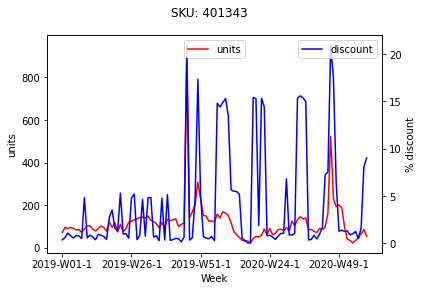

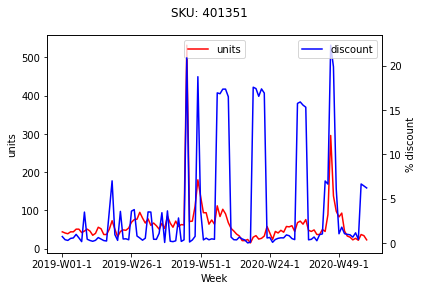

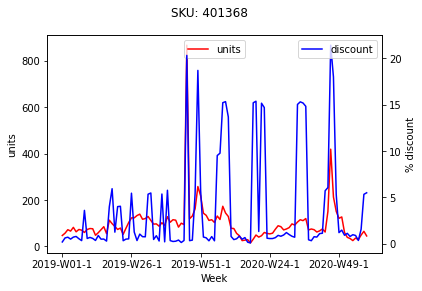

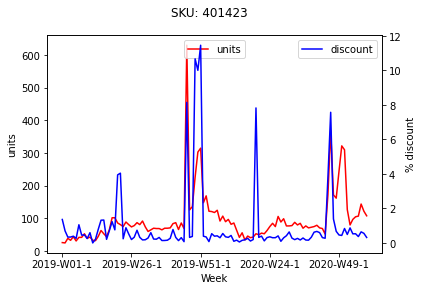

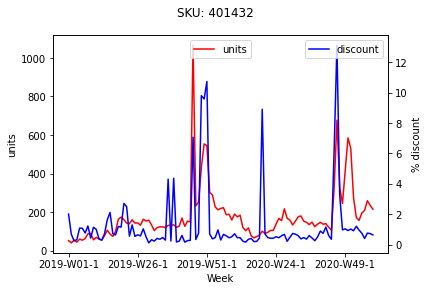

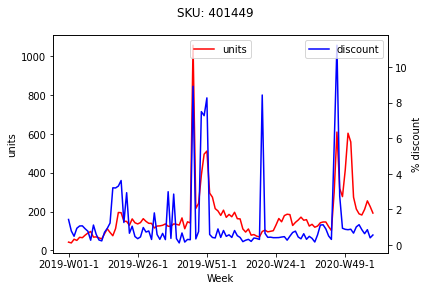

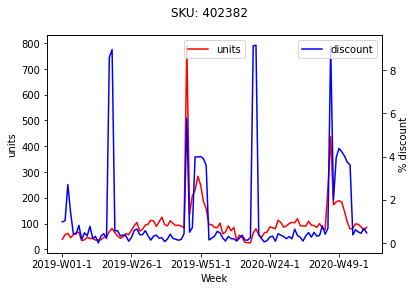

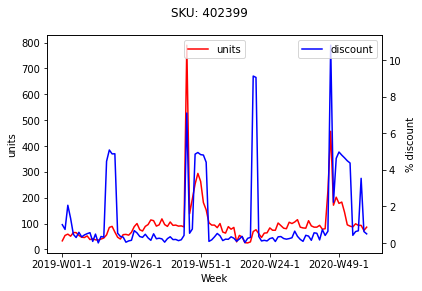

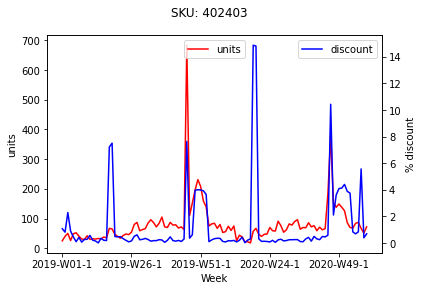

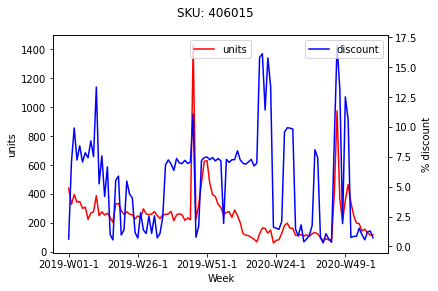

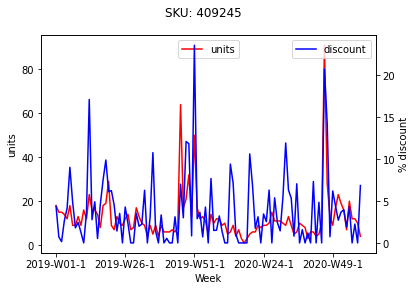

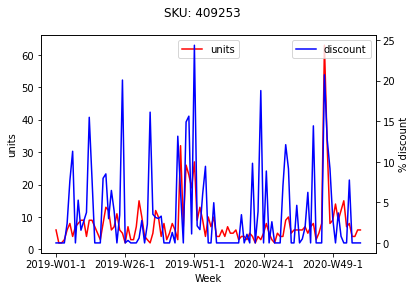

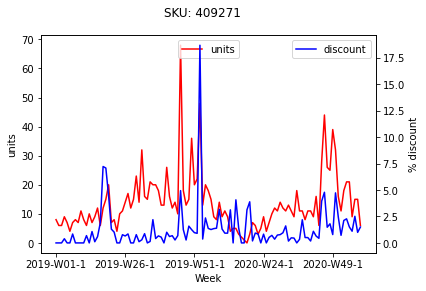

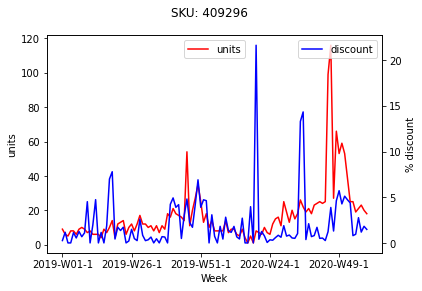

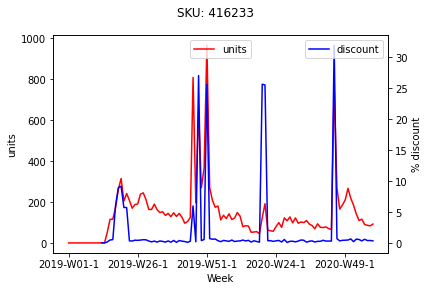

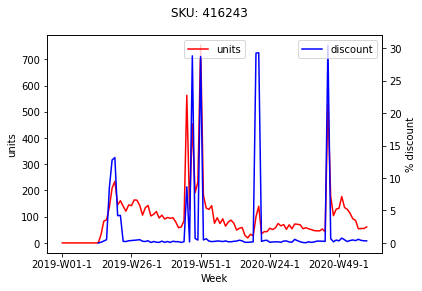

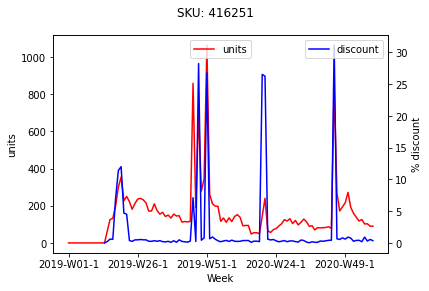

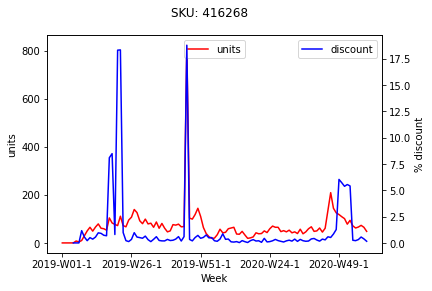

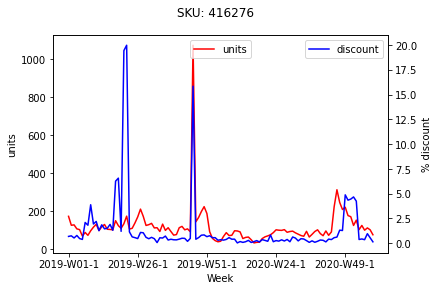

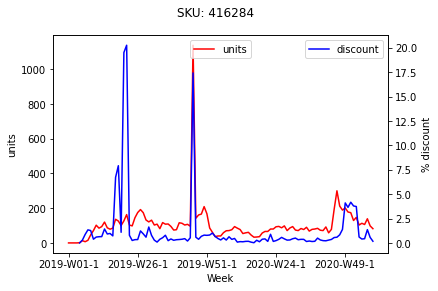

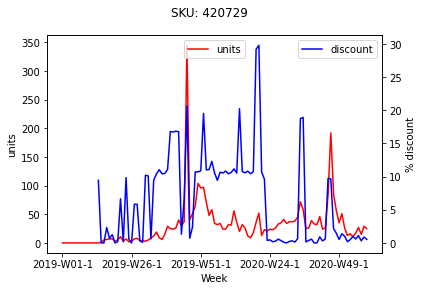

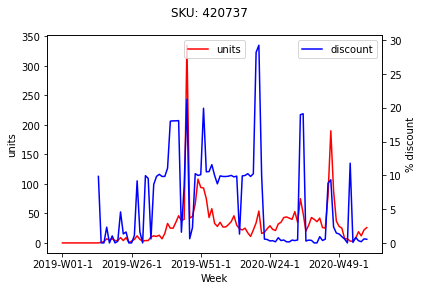

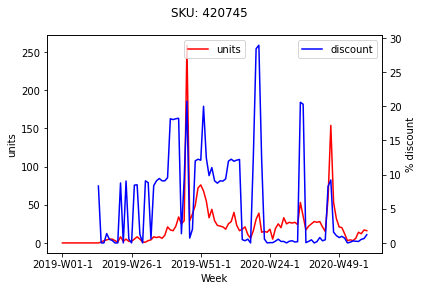

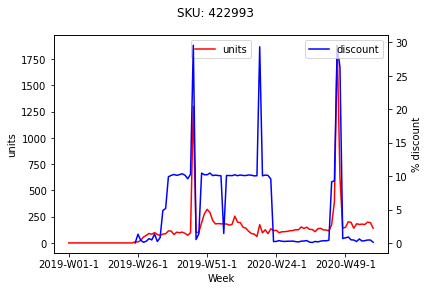

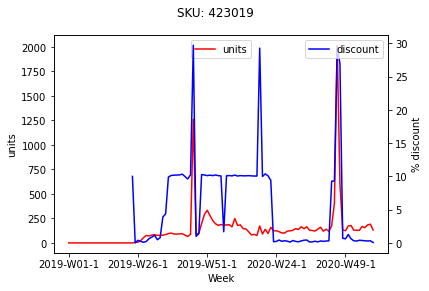

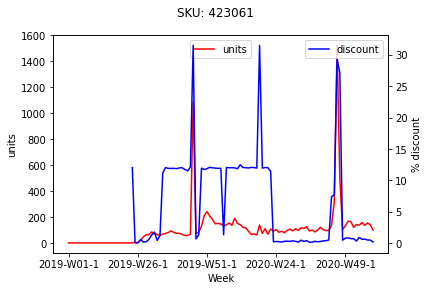

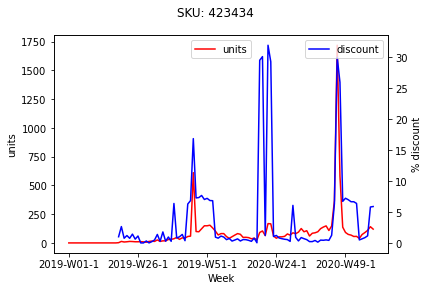

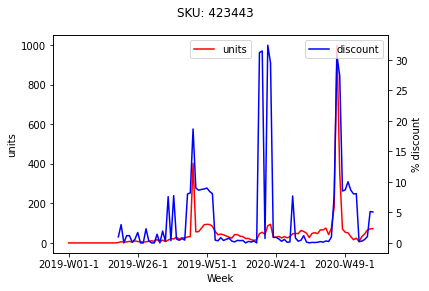

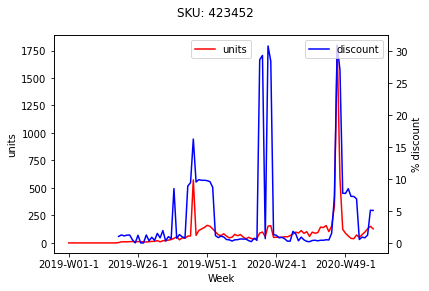

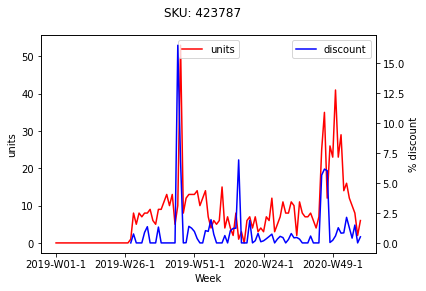

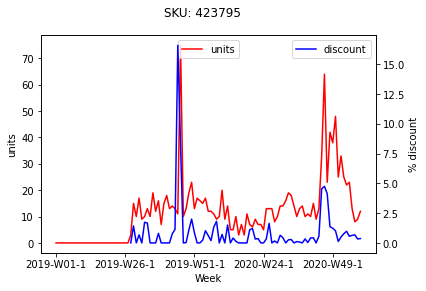

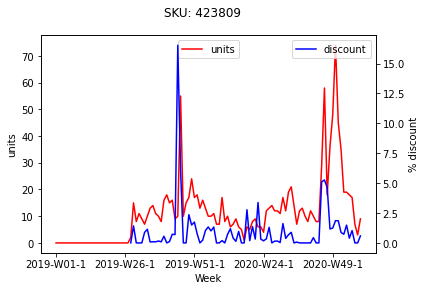

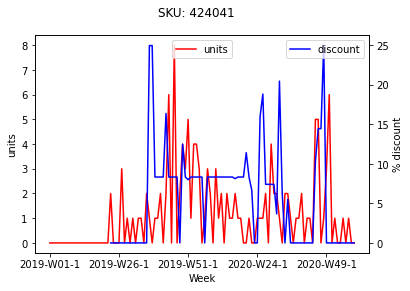

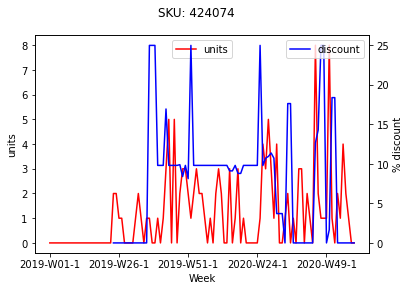

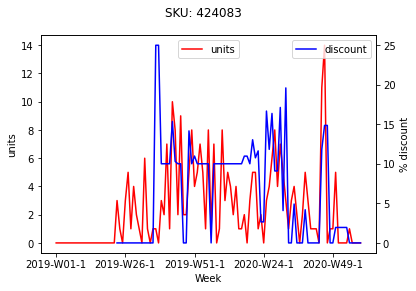

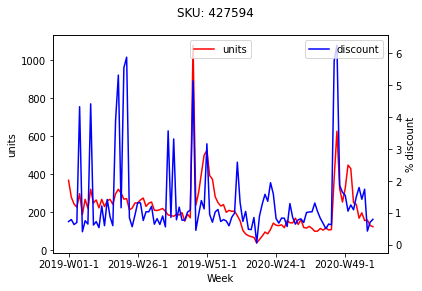

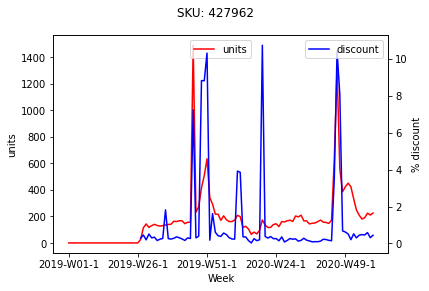

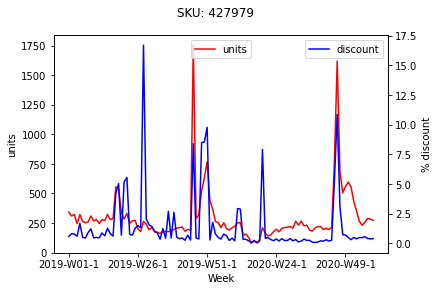

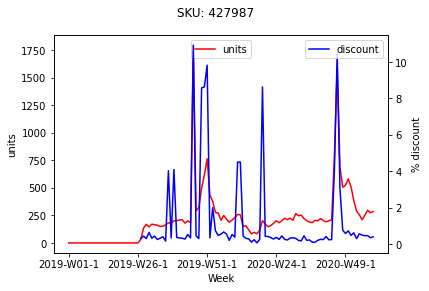

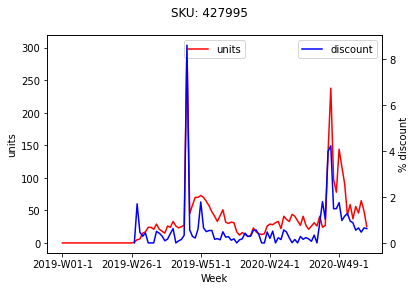

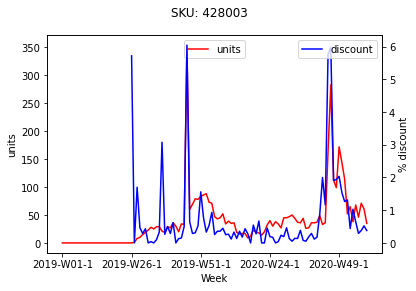

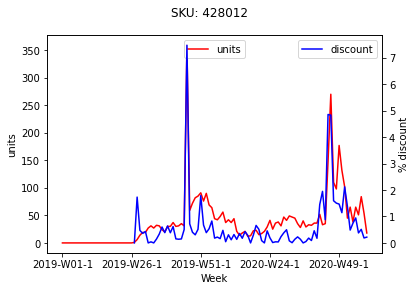

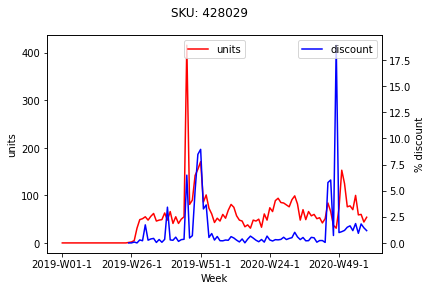

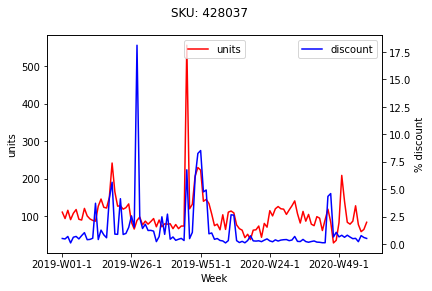

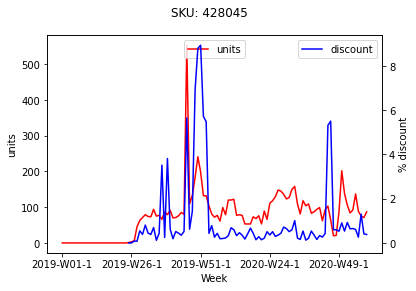

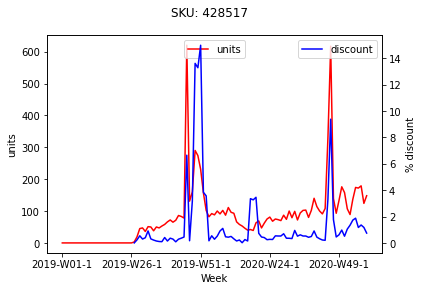

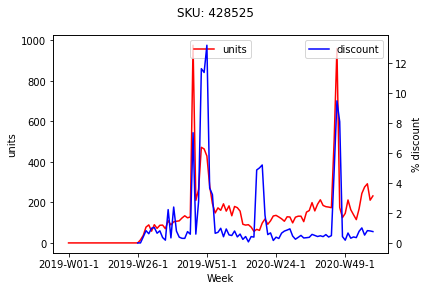

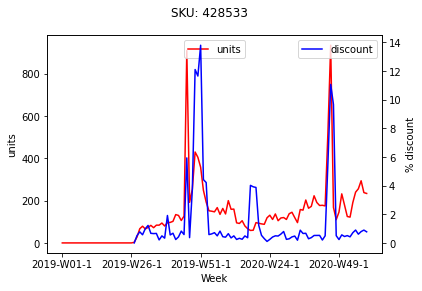

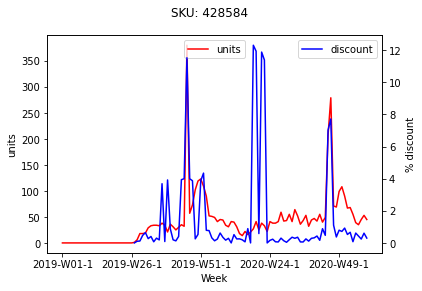

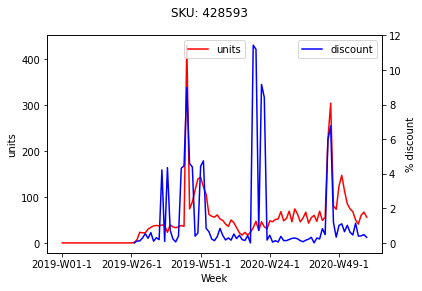

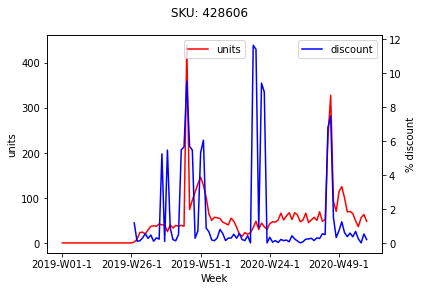

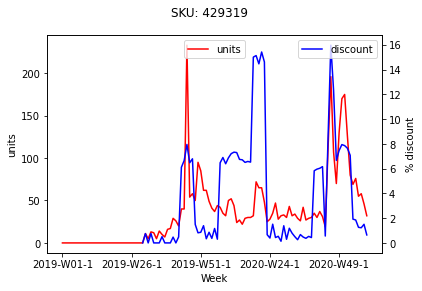

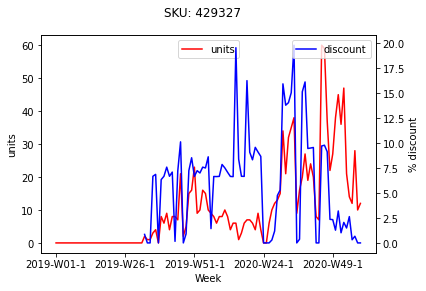

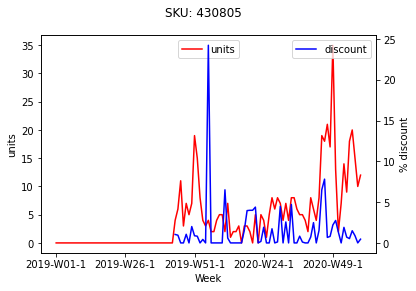

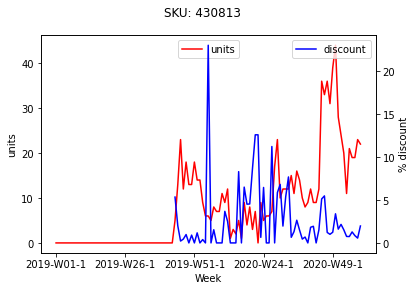

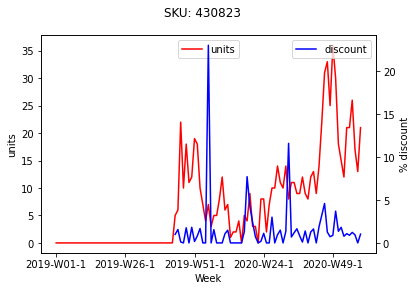

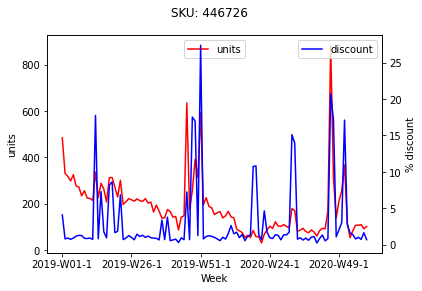

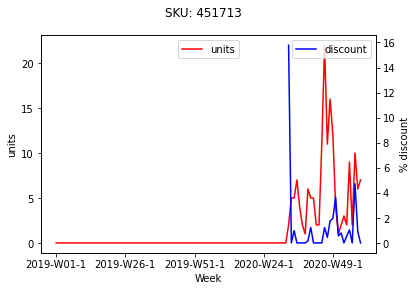

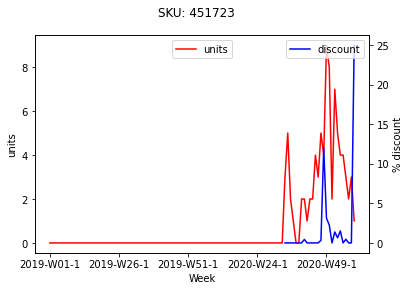

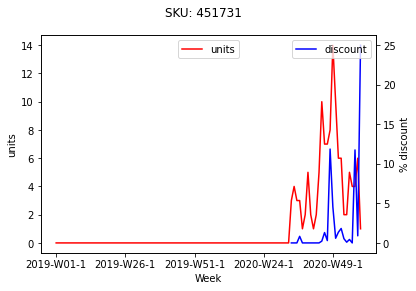

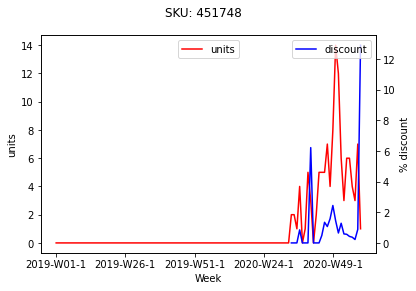

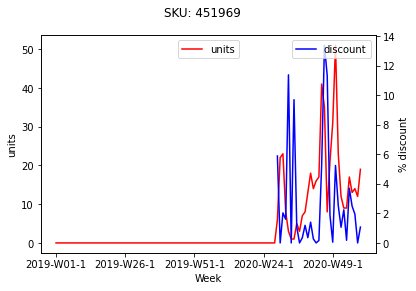

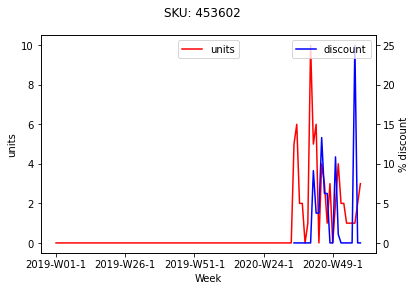

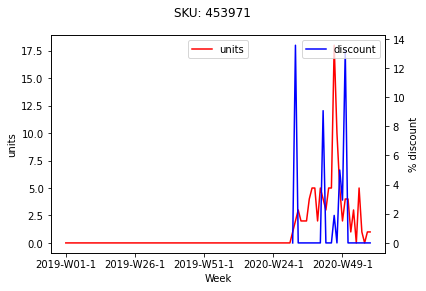

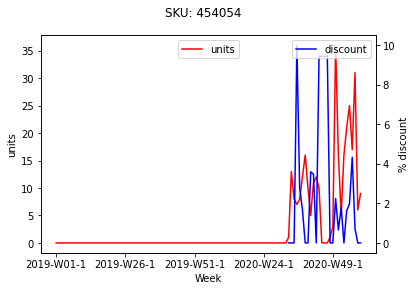

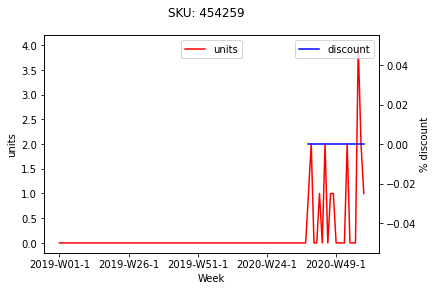

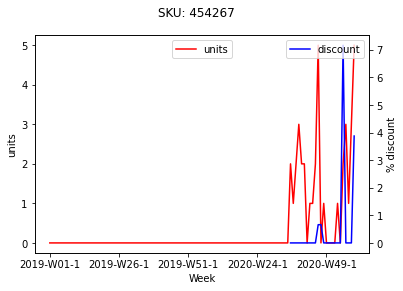

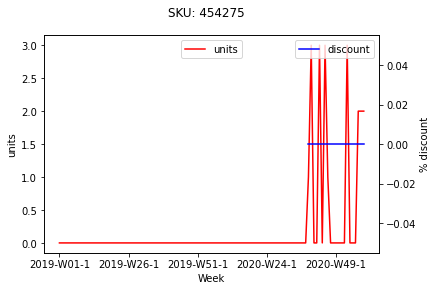

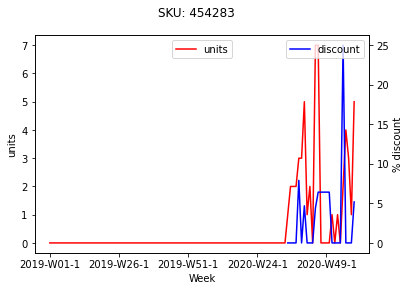

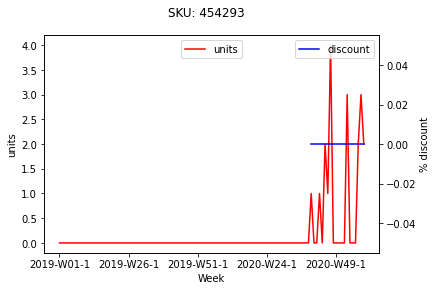

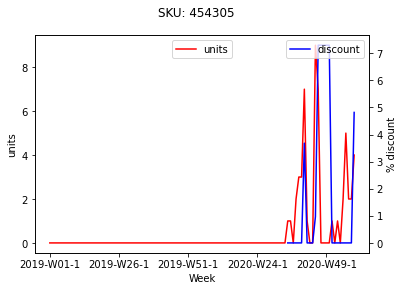

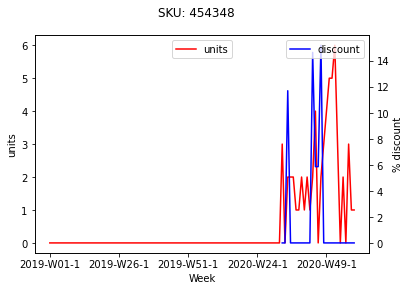

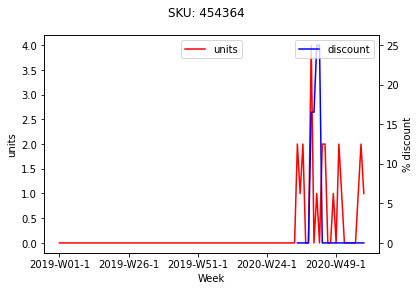

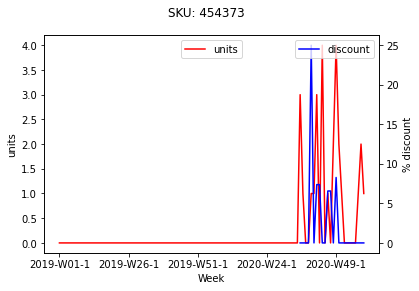

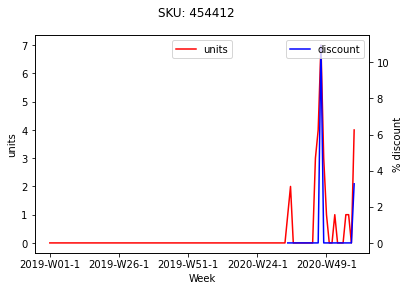

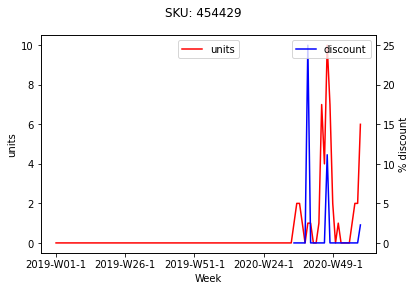

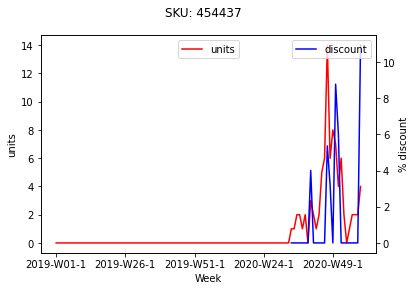

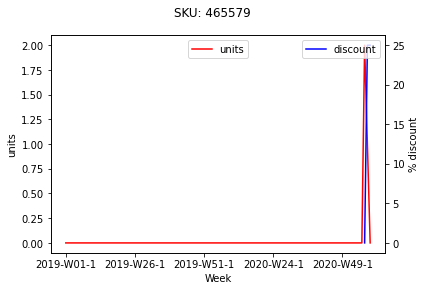

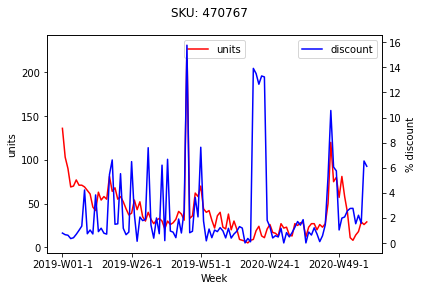

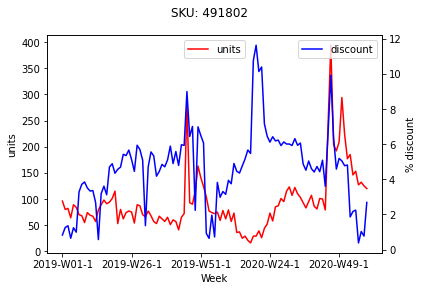

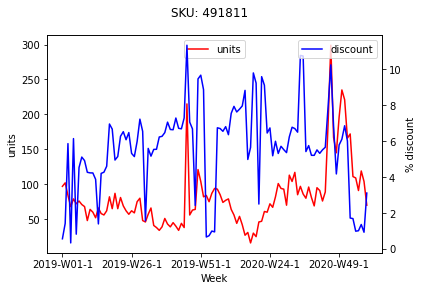

In [32]:
# Just to visualize if there is some relationship between "units" and created variable "discount_percentage" plots are performed.
# In several cases, a direct correlation between high sales and discount percentage is noted. this gives us an indication that both variables are important to the model


from matplotlib.ticker import MaxNLocator
for sku in df_2.SKU.unique():
  fig, ax =plt.subplots(1)
  fig,plt.suptitle('SKU: '+str(sku))

  ax.plot(df_2.loc[df_2.SKU==sku].ISO, df_2.loc[df_2.SKU==sku].units, c='r')
  ax.xaxis.set_major_locator(MaxNLocator(5))
  ax.set_xlabel('Week')
  ax.set_ylabel('units')
  ax.legend(['units'], loc='upper center')

  ax2 =ax.twinx()
  ax2.plot(df_2.loc[df_2.SKU==sku].ISO, df_2.loc[df_2.SKU==sku].discount_percentage, c='b')
  ax2.set_ylabel('% discount')
  ax2.xaxis.set_major_locator(MaxNLocator(5))
  ax2.legend(['discount'], loc='upper right')




An option to choose features is to analyze the behavior of the variance, but this time we are going to use the sklearn library function to perform the feature selection.

In [33]:
# Let'star with  the best seller SKU dataframe 
df_sku = df_2.loc[df_2.SKU==list_90_percent_best_seller[0]]



In [34]:
# Identifying features and target/label: In this case the label will be 'units' because we want to predict the number of sale units. In other study cases could be added another variables to target.
# Create X (features) and Y(label)

X = df_sku.drop(['units',  'DC','Year', 'Week_number','SKU','Week', 'ISO', 'Date'],axis=1)  # Remove not usable columns from label dataset
y = df_sku['units']


In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# Scale the data in X
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax= min_max_scaler.fit_transform(X)

# Selecting the Best important features according to Logistic Regression using SelectFromModel
sfm_selector = SelectFromModel(estimator=LogisticRegression())
sfm_selector.fit(X_minmax, y)
feature_selection= X.columns[sfm_selector.get_support()]
feature_selection

Index(['base_price', 'discounted_price', 'total_units', 'New Year', 'Wise men',
       'Constitution', 'Valentines Day', 'Birth of Benito Juarez',
       'Good Friday', 'Childrens Day', 'Mothers Day', 'Fathers Day',
       'Independence Day', 'Day of the dead', 'Revolution Day', 'Christmas',
       'Play off Mexican Soccer League', 'Caribbean Series', 'LMP (Baseball)',
       'LMV (Baseball)', 'Superbowl', 'World Series', 'December ',
       'discount_percentage'],
      dtype='object')

## 8. Predicive Model

In [36]:
# Using the features suggested in last step we now can have X and y as follows

X = df_sku[feature_selection]
y = df_sku['units']


In [37]:
# Create training and test sets according to Pareto's principle
import numpy as np
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test), len(y_train)




(111, 88, 23, 88)

In [38]:
import tensorflow as tf 
# Build a neural network 

tf.random.set_seed(42)

# 1. Create a model

model = tf.keras.Sequential([ tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# 3. Fit the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 1647.7651 - mae: 1647.7651
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 687.0048 - mae: 687.0048
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 765.8582 - mae: 765.8582
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 446.6309 - mae: 446.6309
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 241.0882 - mae: 241.0882
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 171.4981 - mae: 171.4981
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 221.1533 - mae: 221.1533
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 167.0503 - mae: 167.0503
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 162.0756 - mae: 162.0756
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 127.1285 - mae: 127.1285
Epoch 11/100
3/3 [===================

In [39]:
# Check the results of model on the test data
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 136ms/step - loss: 41.3295 - mae: 41.3295


[41.32948303222656, 41.32948303222656]

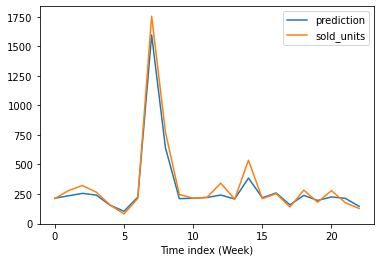

In [40]:

model_prediction = model.predict(X_test)
plt.plot(model_prediction,label='prediction')
plt.plot(y_test, label='sold_units')
plt.xlabel('Time index (Week)')
plt.legend()


Text(0.5, 0, 'epochs')

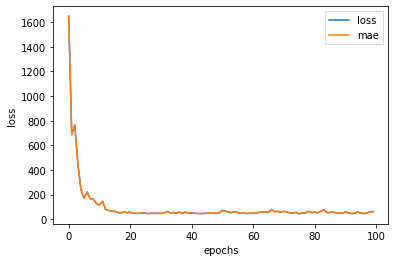

In [41]:
# plot history (training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### 8.1 Model 2

In [85]:
# Performing now a training set X_train consisting in data before 2021.05 and X_test consisting in data between 2021.05 and 2021.07

df_sku = df_2.loc[df_2.SKU==list_90_percent_best_seller[0]]
X_train = df_sku.loc[df_sku.Week.between('2019.01','2021.04')].drop(['units',  'DC','Year', 'Week_number','SKU','Week', 'ISO', 'Date'],axis=1)
X_test = df_sku.loc[df_sku.Week.between('2021.05','2021.07')].drop(['units',  'DC','Year', 'Week_number','SKU','Week', 'ISO', 'Date'],axis=1)

y_train = df_sku.loc[df_sku.Week.between('2019.01','2021.04')]['units']
y_test = df_sku.loc[df_sku.Week.between('2021.05','2021.07')]['units']






In [87]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [60]:
import tensorflow as tf 
# Build a neural network 

tf.random.set_seed(42)

# 1. Create a model

model_2 = tf.keras.Sequential([ tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# 3. Fit the model
history_2 = model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 401.1697 - mae: 401.1697
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 243.5172 - mae: 243.5172
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 211.1393 - mae: 211.1393
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 193.8515 - mae: 193.8515
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 158.3027 - mae: 158.3027
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 139.8606 - mae: 139.8606
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 110.7471 - mae: 110.7471
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 96.3321 - mae: 96.3321
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 85.1966 - mae: 85.1966
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 73.7176 - mae: 73.7176
Epoch 11/100
4/4 [===========================

In [61]:
# Check the results of model on the test data
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 105ms/step - loss: 18.8097 - mae: 18.8097


[18.80974769592285, 18.80974769592285]

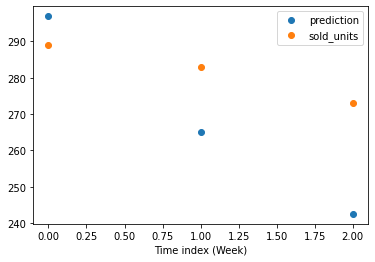

In [78]:
y_pred = model_2.predict(X_test)
plt.plot(y_pred,label='prediction', marker='o', linestyle='')
plt.plot(y_test, label='sold_units', marker='o', linestyle='')
plt.xlabel('Time index (Week)')
plt.legend()

Text(0.5, 0, 'epochs')

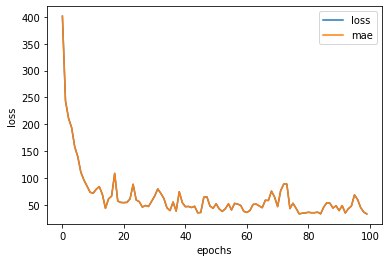

In [72]:
# plot history (training curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [94]:
# Since we don't have more info about weeks 7-8-9-10, let's "simulate" the data by random selecting  4 rows from all data available (except weeks 5,6,7) and perfom a prediction 
df_sample = df_sku.loc[df_sku.Week.between('2014.01','2021.04')].drop(['units',  'DC','Year', 'Week_number','SKU','Week', 'ISO', 'Date'],axis=1)
X_simulated = df_sample.sample(4)
X_simulated = np.asarray(X_simulated).astype(np.float32)



In [96]:
prediction_weeks_7_8_9_10 = model_2.predict(X_simulated)
prediction_weeks_7_8_9

array([[620.05347],
       [286.76205],
       [224.44714],
       [ 84.69111]], dtype=float32)